# Final Project Notebook

## Imports

In [1]:
%matplotlib inline
import dill
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as f1
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
import tensorflow as tf
from keras import layers
from xgboost import XGBRegressor

c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Getting Each Session per Season

In [2]:
# Getting all practice sessions and qualifying sessions between 2018, 2021. This is a stable region in the turbo hybrid era. The API does not have access to information before 2018. 2022 is the current season which brought along heavily revised car designs and regulations.
f1.Cache.enable_cache('../F1-Data-Play/cache/fastf1_http_cache.sqlite/')
# 2018 season
au_fp1_2018 = f1.get_session(2018, 'Australia', 'FP1')
au_fp2_2018 = f1.get_session(2018, 'Australia', 'FP2')
au_fp3_2018 = f1.get_session(2018, 'Australia', 'FP3')
au_Q_2018 = f1.get_session(2018, 'Australia', 'Q')
ba_fp1_2018 = f1.get_session(2018, 'Bahrain', 'FP1')
ba_fp2_2018 = f1.get_session(2018, 'Bahrain', 'FP2')
ba_fp3_2018 = f1.get_session(2018, 'Bahrain', 'FP3')
ba_Q_2018 = f1.get_session(2018, 'Bahrain', 'Q')
ch_fp1_2018 = f1.get_session(2018, 'China', 'FP1')
ch_fp2_2018 = f1.get_session(2018, 'China', 'FP2')
ch_fp3_2018 = f1.get_session(2018, 'China', 'FP3')
ch_Q_2018 = f1.get_session(2018, 'China', 'Q')
az_fp1_2018 = f1.get_session(2018, 'Azerbaijan', 'FP1')
az_fp2_2018 = f1.get_session(2018, 'Azerbaijan', 'FP2')
az_fp3_2018 = f1.get_session(2018, 'Azerbaijan', 'FP3')
az_Q_2018 = f1.get_session(2018, 'Azerbaijan', 'Q')
sp_fp1_2018 = f1.get_session(2018, 'Spain', 'FP1')
sp_fp2_2018 = f1.get_session(2018, 'Spain', 'FP2')
sp_fp3_2018 = f1.get_session(2018, 'Spain', 'FP3')
sp_Q_2018 = f1.get_session(2018, 'Spain', 'Q')
mo_fp1_2018 = f1.get_session(2018, 'Monaco', 'FP1')
mo_fp2_2018 = f1.get_session(2018, 'Monaco', 'FP2')
mo_fp3_2018 = f1.get_session(2018, 'Monaco', 'FP3')
mo_Q_2018 = f1.get_session(2018, 'Monaco', 'Q')
can_fp1_2018 = f1.get_session(2018, 'Canada', 'FP1')
can_fp2_2018 = f1.get_session(2018, 'Canada', 'FP2')
can_fp3_2018 = f1.get_session(2018, 'Canada', 'FP3')
can_Q_2018 = f1.get_session(2018, 'Canada', 'Q')
fr_fp1_2018 = f1.get_session(2018, 'France', 'FP1')
fr_fp2_2018 = f1.get_session(2018, 'France', 'FP2')
fr_fp3_2018 = f1.get_session(2018, 'France', 'FP3')
fr_Q_2018 = f1.get_session(2018, 'France', 'Q')
aus_fp1_2018 = f1.get_session(2018, 'Austria', 'FP1')
aus_fp2_2018 = f1.get_session(2018, 'Austria', 'FP2')
aus_fp3_2018 = f1.get_session(2018, 'Austria', 'FP3')
aus_Q_2018 = f1.get_session(2018, 'Austria', 'Q')
uk_fp1_2018 = f1.get_session(2018, 'British', 'FP1')
uk_fp2_2018  = f1.get_session(2018, 'British', 'FP2')
uk_fp3_2018 = f1.get_session(2018, 'British', 'FP3')
uk_Q_2018 = f1.get_session(2018, 'British', 'Q')
ger_fp1_2018 = f1.get_session(2018, 'Germany', 'FP1')
ger_fp2_2018 = f1.get_session(2018, 'Germany', 'FP2')
ger_fp3_2018 = f1.get_session(2018, 'Germany', 'FP3')
ger_Q_2018 = f1.get_session(2018, 'Germany', 'Q')
hun_fp1_2018 = f1.get_session(2018, 'Hungary', 'FP1')
hun_fp2_2018 = f1.get_session(2018, 'Hungary', 'FP2')
hun_fp3_2018 = f1.get_session(2018, 'Hungary', 'FP3')
hun_Q_2018 = f1.get_session(2018, 'Hungary', 'Q')
bel_fp1_2018 = f1.get_session(2018, 'Belgian', 'FP1')
bel_fp2_2018 = f1.get_session(2018, 'Belgian', 'FP2')
bel_fp3_2018 = f1.get_session(2018, 'Belgian', 'FP3')
bel_Q_2018 = f1.get_session(2018, 'Belgian', 'Q')
it_fp1_2018 = f1.get_session(2018, 'Italy', 'FP1')
it_fp2_2018 = f1.get_session(2018, 'Italy', 'FP2')
it_fp3_2018 = f1.get_session(2018, 'Italy', 'FP3')
it_Q_2018 = f1.get_session(2018, 'Italy', 'Q')
sing_fp1_2018 = f1.get_session(2018, 'Singapore', 'FP1')
sing_fp2_2018 = f1.get_session(2018, 'Singapore', 'FP2')
sing_fp3_2018 = f1.get_session(2018, 'Singapore', 'FP3')
sing_Q_2018 = f1.get_session(2018, 'Singapore', 'Q')
rus_fp1_2018 = f1.get_session(2018, 'Russia', 'FP1')
rus_fp2_2018 = f1.get_session(2018, 'Russia', 'FP2')
rus_fp3_2018 = f1.get_session(2018, 'Russia', 'FP3')
rus_Q_2018 = f1.get_session(2018, 'Russia', 'Q')
jap_fp1_2018 = f1.get_session(2018, 'Japan', 'FP1')
jap_fp2_2018 = f1.get_session(2018, 'Japan', 'FP2')
jap_fp3_2018 = f1.get_session(2018, 'Japan', 'FP3')
jap_Q_2018 = f1.get_session(2018, 'Japan', 'Q')
us_fp1_2018 = f1.get_session(2018, 'US', 'FP1')
us_fp2_2018 = f1.get_session(2018, 'US', 'FP2')
us_fp3_2018 = f1.get_session(2018, 'US', 'FP3')
us_Q_2018 = f1.get_session(2018, 'US', 'Q')
mex_fp1_2018 = f1.get_session(2018, 'Mexico', 'FP1')
mex_fp2_2018 = f1.get_session(2018, 'Mexico', 'FP2')
mex_fp3_2018 = f1.get_session(2018, 'Mexico', 'FP3')
mex_Q_2018 = f1.get_session(2018, 'Mexico', 'Q')
braz_fp1_2018 = f1.get_session(2018, 'Brazil', 'FP1')
braz_fp2_2018 = f1.get_session(2018, 'Brazil', 'FP2')
braz_fp3_2018 = f1.get_session(2018, 'Brazil', 'FP3')
braz_Q_2018 = f1.get_session(2018, 'Brazil', 'Q')
ab_fp1_2018 = f1.get_session(2018, 'Abu Dhabi', 'FP1')
abu_fp2_2018 = f1.get_session(2018, 'Abu Dhabi', 'FP2')
abu_fp3_2018 = f1.get_session(2018, 'Abu Dhabi', 'FP3')
abu_Q_2018 = f1.get_session(2018, 'Abu Dhabi', 'Q')
# 2019 season
au_fp1_2019 = f1.get_session(2019, 'Australia', 'FP1')
au_fp2_2019 = f1.get_session(2019, 'Australia', 'FP2')
au_fp3_2019 = f1.get_session(2019, 'Australia', 'FP3')
au_Q_2019 = f1.get_session(2019, 'Australia', 'Q')
ba_fp1_2019 = f1.get_session(2019, 'Bahrain', 'FP1')
ba_fp2_2019 = f1.get_session(2019, 'Bahrain', 'FP2')
ba_fp3_2019 = f1.get_session(2019, 'Bahrain', 'FP3')
ba_Q_2019 = f1.get_session(2019, 'Bahrain', 'Q')
ch_fp1_2019 = f1.get_session(2019, 'China', 'FP1')
ch_fp2_2019 = f1.get_session(2019, 'China', 'FP2')
ch_fp3_2019 = f1.get_session(2019, 'China', 'FP3')
ch_Q_2019  = f1.get_session(2019, 'China', 'Q')
az_fp1_2019 = f1.get_session(2019, 'Azerbaijan', 'FP1')
az_fp2_2019 = f1.get_session(2019, 'Azerbaijan', 'FP2')
az_fp3_2019 = f1.get_session(2019, 'Azerbaijan', 'FP3')
az_Q_2019 = f1.get_session(2019, 'Azerbaijan', 'Q')
sp_fp1_2019 = f1.get_session(2019, 'Spain', 'FP1')
sp_fp2_2019 = f1.get_session(2019, 'Spain', 'FP2')
sp_fp3_2019 = f1.get_session(2019, 'Spain', 'FP3')
sp_Q_2019 = f1.get_session(2019, 'Spain', 'Q')
mo_fp1_2019 = f1.get_session(2019, 'Monaco', 'FP1')
mo_fp2_2019 = f1.get_session(2019, 'Monaco', 'FP2')
mo_fp3_2019 = f1.get_session(2019, 'Monaco', 'FP3')
mo_Q_2019 = f1.get_session(2019, 'Monaco', 'Q')
can_fp1_2019 = f1.get_session(2019, 'Canada', 'FP1')
can_fp2_2019 = f1.get_session(2019, 'Canada', 'FP2')
can_fp3_2019 = f1.get_session(2019, 'Canada', 'FP3')
can_Q_2019 = f1.get_session(2019, 'Canada', 'Q')
fr_fp1_2019 = f1.get_session(2019, 'France', 'FP1')
fr_fp2_2019 = f1.get_session(2019, 'France', 'FP2')
fr_fp3_2019 = f1.get_session(2019, 'France', 'FP3')
fr_Q_2019 = f1.get_session(2019, 'France', 'Q')
aus_fp1_2019 = f1.get_session(2019, 'Austria', 'FP1')
aus_fp2_2019 = f1.get_session(2019, 'Austria', 'FP2')
aus_fp3_2019 = f1.get_session(2019, 'Austria', 'FP3')
aus_Q_2019 = f1.get_session(2019, 'Austria', 'Q')
uk_fp1_2019 = f1.get_session(2019, 'British', 'FP1')
uk_fp2_2019 = f1.get_session(2019, 'British', 'FP2')
uk_fp3_2019 = f1.get_session(2019, 'British', 'FP3')
uk_Q_2019 = f1.get_session(2019, 'British', 'Q')
ger_fp1_2019 = f1.get_session(2019, 'Germany', 'FP1')
ger_fp2_2019 = f1.get_session(2019, 'Germany', 'FP2')
ger_fp3_2019 = f1.get_session(2019, 'Germany', 'FP3')
ger_Q_2019 = f1.get_session(2019, 'Germany', 'Q')
hun_fp1_2019 = f1.get_session(2019, 'Hungary', 'FP1')
hun_fp2_2019 = f1.get_session(2019, 'Hungary', 'FP2')
hun_fp3_2019 = f1.get_session(2019, 'Hungary', 'FP3')
hun_Q_2019 = f1.get_session(2019, 'Hungary', 'Q')
bel_fp1_2019 = f1.get_session(2019, 'Belgian', 'FP1')
bel_fp2_2019 = f1.get_session(2019, 'Belgian', 'FP2')
bel_fp3_2019 = f1.get_session(2019, 'Belgian', 'FP3')
bel_Q_2019 = f1.get_session(2019, 'Belgian', 'Q')
it_fp1_2019 = f1.get_session(2019, 'Italy', 'FP1')
it_fp2_2019 = f1.get_session(2019, 'Italy', 'FP2')
it_fp3_2019 = f1.get_session(2019, 'Italy', 'FP3')
it_Q_2019 = f1.get_session(2019, 'Italy', 'Q')
sing_fp1_2019 = f1.get_session(2019, 'Singapore', 'FP1')
sing_fp2_2019 = f1.get_session(2019, 'Singapore', 'FP2')
sing_fp3_2019 = f1.get_session(2019, 'Singapore', 'FP3')
sing_Q_2019 = f1.get_session(2019, 'Singapore', 'Q')
rus_fp1_2019 = f1.get_session(2019, 'Russia', 'FP1')
rus_fp2_2019 = f1.get_session(2019, 'Russia', 'FP2')
rus_fp3_2019 = f1.get_session(2019, 'Russia', 'FP3')
rus_Q_2019 = f1.get_session(2019, 'Russia', 'Q')
jap_fp1_2019 = f1.get_session(2019, 'Japan', 'FP1')
jap_fp2_2019 = f1.get_session(2019, 'Japan', 'FP2')
jap_fp3_2019 = f1.get_session(2019, 'Japan', 'FP3')
jap_Q_2019 = f1.get_session(2019, 'Japan', 'Q')
mex_fp1_2019 = f1.get_session(2019, 'Mexico', 'FP1')
mex_fp2_2019 = f1.get_session(2019, 'Mexico', 'FP2')
mex_fp3_2019 = f1.get_session(2019, 'Mexico', 'FP3')
mex_Q_2019 = f1.get_session(2019, 'Mexico', 'Q')
us_fp1_2019 = f1.get_session(2019, 'US', 'FP1')
us_fp2_2019 = f1.get_session(2019, 'US', 'FP2')
us_fp3_2019 = f1.get_session(2019, 'US', 'FP3')
us_Q_2019 = f1.get_session(2019, 'US', 'Q')
braz_fp1_2019 = f1.get_session(2019, 'Brazil', 'FP1')
braz_fp2_2019 = f1.get_session(2019, 'Brazil', 'FP2')
braz_fp3_2019 = f1.get_session(2019, 'Brazil', 'FP3')
braz_Q_2019 = f1.get_session(2019, 'Brazil', 'Q')
abu_fp1_2019 = f1.get_session(2019, 'Abu Dhabi', 'FP1')
abu_fp2_2019 = f1.get_session(2019, 'Abu Dhabi', 'FP2')
abu_fp3_2019 = f1.get_session(2019, 'Abu Dhabi', 'FP3')
abu_Q_2019 = f1.get_session(2019, 'Abu Dhabi', 'Q')
# 2020 season
aus_fp1_2020 = f1.get_session(2020, 1 , 'FP1')
aus_fp2_2020 = f1.get_session(2020, 1, 'FP2')
aus_fp3_2020 = f1.get_session(2020, 1, 'FP3')
aus_Q_2020 = f1.get_session(2020, 1, 'Q')
spiel_fp1_2020 = f1.get_session(2020, 2, 'FP1')
spiel_fp2_2020 = f1.get_session(2020, 2, 'FP2')
spiel_fp3_2020 = f1.get_session(2020, 2, 'FP3')
spiel_Q_2020 = f1.get_session(2020, 2, 'Q')
hun_fp1_2020 = f1.get_session(2020, 'Hungary', 'FP1')
hun_fp2_2020 = f1.get_session(2020, 'Hungary', 'FP2')
hun_fp3_2020 = f1.get_session(2020, 'Hungary', 'FP3')
hun_Q_2020 = f1.get_session(2020, 'Hungary', 'Q')
uk_fp1_2020 = f1.get_session(2020, 4, 'FP1')
uk_fp2_2020 = f1.get_session(2020, 4, 'FP2')
uk_fp3_2020 = f1.get_session(2020, 4, 'FP3')
uk_Q_2020 = f1.get_session(2020, 4, 'Q')
brit_fp1_2020 = f1.get_session(2020, 5, 'FP1')
brit_fp2_2020 = f1.get_session(2020, 5, 'FP2')
brit_fp3_2020 = f1.get_session(2020, 5, 'FP3')
brit_Q_2020 = f1.get_session(2020, 5, 'Q')
sp_fp1_2020 = f1.get_session(2020, 'Spain', 'FP1')
sp_fp2_2020 = f1.get_session(2020, 'Spain', 'FP2')
sp_fp3_2020 = f1.get_session(2020, 'Spain', 'FP3')
sp_Q_2020 = f1.get_session(2020, 'Spain', 'Q')
bel_fp1_2020 = f1.get_session(2020, 'Belgian', 'FP1')
bel_fp2_2020 = f1.get_session(2020, 'Belgian', 'FP2')
bel_fp3_2020 = f1.get_session(2020, 'Belgian', 'FP3')
bel_Q_2020 = f1.get_session(2020, 'Belgian', 'Q')
it_fp1_2020 = f1.get_session(2020, 8, 'FP1')
it_fp2_2020 = f1.get_session(2020, 8, 'FP2')
it_fp3_2020 = f1.get_session(2020, 8, 'FP3')
it_Q_2020 = f1.get_session(2020, 8, 'Q')
tus_fp1_2020 = f1.get_session(2020, 9, 'FP1')
tus_fp2_2020 = f1.get_session(2020, 9, 'FP2')
tus_fp3_2020 = f1.get_session(2020, 9, 'FP3')
tus_Q_2020 = f1.get_session(2020, 9, 'Q')
rus_fp1_2020 = f1.get_session(2020, 'Russia', 'FP1')
rus_fp2_2020 = f1.get_session(2020, 'Russia', 'FP2')
rus_fp3_2020 = f1.get_session(2020, 'Russia', 'FP3')
rus_Q_2020 = f1.get_session(2020, 'Russia', 'Q')
ger_fp1_2020 = f1.get_session(2020, 'Germany', 'FP1')
ger_fp2_2020 = f1.get_session(2020, 'Germany', 'FP2')
ger_fp3_2020 = f1.get_session(2020, 'Germany', 'FP3')
ger_Q_2020 = f1.get_session(2020, 'Germany', 'Q')
por_fp1_2020 = f1.get_session(2020, 'Portugal', 'FP1')
por_fp2_2020 = f1.get_session(2020, 'Portugal', 'FP2')
por_fp3_2020 = f1.get_session(2020, 'Portugal', 'FP3')
por_Q_2020 = f1.get_session(2020, 'Portugal', 'Q')
rom_fp1_2020 = f1.get_session(2020, 13, 'FP1')
rom_fp2_2020 = f1.get_session(2020, 13, 'FP2', force_ergast=True)
rom_fp3_2020 = f1.get_session(2020, 13, 'FP3', force_ergast=True)
rom_Q_2020 = f1.get_session(2020, 13, 'Q')
tur_fp1_2020 = f1.get_session(2020, 'Turkey', 'FP1')
tur_fp2_2020 = f1.get_session(2020, 'Turkey', 'FP2')
tur_fp3_2020 = f1.get_session(2020, 'Turkey', 'FP3')
tur_Q_2020 = f1.get_session(2020, 'Turkey', 'Q')
ba_fp1_2020 = f1.get_session(2020, 15, 'FP1')
ba_fp2_2020 = f1.get_session(2020, 15, 'FP2')
ba_fp3_2020 = f1.get_session(2020, 15, 'FP3')
ba_Q_2020 = f1.get_session(2020, 15, 'Q')
sak_fp1_2020 = f1.get_session(2020, 16, 'FP1')
sak_fp2_2020 = f1.get_session(2020, 16, 'FP2')
sak_fp3_2020 = f1.get_session(2020, 16, 'FP3')
sak_Q_2020 = f1.get_session(2020, 16, 'Q')
abu_fp1_2020 = f1.get_session(2020, 'Abu Dhabi', 'FP1')
# 2021 season (hold-out dataset)
ba_fp1_2021 = f1.get_session(2021, 'Bahrain', 'FP1')
ba_fp2_2021 = f1.get_session(2021, 'Bahrain', 'FP2')
ba_fp3_2021 = f1.get_session(2021, 'Bahrain', 'FP3')
ba_Q_2021 = f1.get_session(2021, 'Bahrain', 'Q')
rom_fp1_2021 = f1.get_session(2021, 2, 'FP1')
rom_fp2_2021 = f1.get_session(2021, 2, 'FP2')
rom_fp3_2021 = f1.get_session(2021, 2, 'FP3')
rom_Q_2021 = f1.get_session(2021, 2, 'Q')
por_fp1_2021 = f1.get_session(2021, 'Portugal', 'FP1')
por_fp2_2021 = f1.get_session(2021, 'Portugal', 'FP2')
por_fp3_2021 = f1.get_session(2021, 'Portugal', 'FP3')
por_Q_2021 = f1.get_session(2021, 'Portugal', 'Q')
sp_fp1_2021 = f1.get_session(2021, 'Spain', 'FP1')
sp_fp2_2021 = f1.get_session(2021, 'Spain', 'FP2')
sp_fp3_2021 = f1.get_session(2021, 'Spain', 'FP3')
sp_Q_2021 = f1.get_session(2021, 'Spain', 'Q')
mo_fp1_2021 = f1.get_session(2021, 'Monaco', 'FP1')
mo_fp2_2021 = f1.get_session(2021, 'Monaco', 'FP2')
mo_fp3_2021 = f1.get_session(2021, 'Monaco', 'FP3')
mo_Q_2021 = f1.get_session(2021, 'Monaco', 'Q')
az_fp1_2021 = f1.get_session(2021, 'Azerbaijan', 'FP1')
az_fp2_2021 = f1.get_session(2021, 'Azerbaijan', 'FP2')
az_fp3_2021 = f1.get_session(2021, 'Azerbaijan', 'FP3')
az_Q_2021 = f1.get_session(2021, 'Azerbaijan', 'Q')
fr_fp1_2021 = f1.get_session(2021, 'France', 'FP1')
fr_fp2_2021 = f1.get_session(2021, 'France', 'FP2')
fr_fp3_2021 = f1.get_session(2021, 'France', 'FP3')
fr_Q_2021 = f1.get_session(2021, 'France', 'Q')
aus_fp1_2021 = f1.get_session(2021, 'Austria', 'FP1')
aus_fp2_2021 = f1.get_session(2021, 'Austria', 'FP2')
aus_fp3_2021 = f1.get_session(2021, 'Austria', 'FP3')
aus_Q_2021 = f1.get_session(2021, 'Austria', 'Q')
spiel_fp1_2021 = f1.get_session(2021, 9, 'FP1')
spiel_fp2_2021 = f1.get_session(2021, 9, 'FP2')
spiel_fp3_2021 = f1.get_session(2021, 9, 'FP3')
spiel_Q_2021 = f1.get_session(2021, 9, 'Q')
uk_fp1_2021 = f1.get_session(2021, 'British', 'FP1')
uk_fp2_2021 = f1.get_session(2021, 'British', 'FP2')
# uk_fp3_2021 = f1.get_session(2021, 'British', 'FP3')
uk_Q_2021 = f1.get_session(2021, 'British', 'Q')
hun_fp1_2021 = f1.get_session(2021, 'Hungary', 'FP1')
hun_fp2_2021 = f1.get_session(2021, 'Hungary', 'FP2')
hun_fp3_2021 = f1.get_session(2021, 'Hungary', 'FP3')
hun_Q_2021 = f1.get_session(2021, 'Hungary', 'Q')
bel_fp1_2021 = f1.get_session(2021, 'Belgian', 'FP1')
bel_fp2_2021 = f1.get_session(2021, 'Belgian', 'FP2')
bel_fp3_2021 = f1.get_session(2021, 'Belgian', 'FP3')
bel_Q_2021 = f1.get_session(2021, 'Belgian', 'Q')
net_fp1_2021 = f1.get_session(2021, 'Netherlands', 'FP1')
net_fp2_2021 = f1.get_session(2021, 'Netherlands', 'FP2')
net_fp3_2021 = f1.get_session(2021, 'Netherlands', 'FP3')
net_Q_2021 = f1.get_session(2021, 'Netherlands', 'Q')
it_fp1_2021 = f1.get_session(2021, 'Italy', 'FP1')
it_fp2_2021 = f1.get_session(2021, 'Italy', 'FP2')
# it_fp3_2021 = f1.get_session(2021, 'Italy', 'FP3')
it_Q_2021 = f1.get_session(2021, 'Italy', 'Q')
rus_fp1_2021 = f1.get_session(2021, 'Russia', 'FP1')
rus_fp2_2021 = f1.get_session(2021, 'Russia', 'FP2')
rus_fp3_2021 = f1.get_session(2021, 'Russia', 'FP3')
rus_Q_2021 = f1.get_session(2021, 'Russia', 'Q')
tur_fp1_2021 = f1.get_session(2021, 'Turkey', 'FP1')
tur_fp2_2021 = f1.get_session(2021, 'Turkey', 'FP2')
tur_fp3_2021 = f1.get_session(2021, 'Turkey', 'FP3')
tur_Q_2021 = f1.get_session(2021, 'Turkey', 'Q')
us_fp1_2021 = f1.get_session(2021, 'US', 'FP1')
us_fp2_2021 = f1.get_session(2021, 'US', 'FP2')
us_fp3_2021 = f1.get_session(2021, 'US', 'FP3')
us_Q_2021 = f1.get_session(2021, 'US', 'Q')
mex_fp1_2021 = f1.get_session(2021, 'US', 'FP1')
mex_fp2_2021 = f1.get_session(2021, 'US', 'FP2')
mex_fp3_2021 = f1.get_session(2021, 'US', 'FP3')
mex_Q_2021 = f1.get_session(2021, 'Mexico', 'Q')
braz_fp1_2021 = f1.get_session(2021, 'Brazil', 'FP1')
braz_fp2_2021 = f1.get_session(2021, 'Brazil', 'FP2')
# braz_fp3_2021 = f1.get_session(2021, 'Brazil', 'FP3')
braz_Q_2021 = f1.get_session(2021, 'Brazil', 'Q')
qa_fp1_2021 = f1.get_session(2021, 'Qatar', 'FP1')
qa_fp2_2021 = f1.get_session(2021, 'Qatar', 'FP2')
qa_fp3_2021 = f1.get_session(2021, 'Qatar', 'FP3')
qa_Q_2021 = f1.get_session(2021, 'Qatar', 'Q')
sau_fp1_2021 = f1.get_session(2021, 'Saudi Arabia', 'FP1')
sau_fp2_2021 = f1.get_session(2021, 'Saudi Arabia', 'FP2')
sau_fp3_2021 = f1.get_session(2021, 'Saudi Arabia', 'FP3')
sau_Q_2021 = f1.get_session(2021, 'Saudi Arabia', 'Q')
abu_fp1_2021 = f1.get_session(2021, 'Abu Dhabi', 'FP1')
abu_fp2_2021 = f1.get_session(2021, 'Abu Dhabi', 'FP2')
abu_fp3_2021 = f1.get_session(2021, 'Abu Dhabi', 'FP3')
abu_Q_2021 = f1.get_session(2021, 'Abu Dhabi', 'Q')

In [3]:
# Missing sessions
abu_fp2_2020 = f1.get_session(2020, 'Abu Dhabi', 'FP2')
abu_fp3_2020 = f1.get_session(2020, 'Abu Dhabi', 'FP3')
abu_Q_2020 = f1.get_session(2020, 'Abu Dhabi', 'Q')

## Loading Sessions

In [4]:
#Getting all practice sessions and qualifying sessions between 2014, 2020. This is a stable region in the turbo hybrid era. Before this there were big changes in the car design and regulations, as well as changes to the weekend format( introduction of sprint race qualifying)
# FastF1 has caches information from the first time you load in data. This reduces time when data needs to be called again.
f1.Cache.enable_cache('../F1-Data-Play/cache/fastf1_http_cache.sqlite/')
#2018 season
au_fp1_2018.load() 
au_fp2_2018.load() 
au_fp3_2018.load() 
au_Q_2018.load()
ba_fp1_2018.load() 
ba_fp2_2018.load() 
ba_fp3_2018.load()
ba_Q_2018.load() 
ch_fp1_2018.load() 
ch_fp2_2018.load()
ch_fp3_2018.load() 
ch_Q_2018.load() 
az_fp1_2018.load() 
az_fp2_2018.load() 
az_fp3_2018.load()
az_Q_2018.load() 
sp_fp1_2018.load() 
sp_fp2_2018.load() 
sp_fp3_2018.load()
sp_Q_2018.load() 
mo_fp1_2018.load() 
mo_fp2_2018.load() 
mo_fp3_2018.load() 
mo_Q_2018.load() 
can_fp1_2018.load() 
can_fp2_2018.load() 
can_fp3_2018.load()
can_Q_2018.load() 
fr_fp1_2018.load() 
fr_fp2_2018.load() 
fr_fp3_2018.load() 
fr_Q_2018.load() 
aus_fp1_2018.load() 
aus_fp2_2018.load() 
aus_fp3_2018.load()
aus_Q_2018.load() 
uk_fp1_2018.load() 
uk_fp2_2018.load() 
uk_fp3_2018.load()
uk_Q_2018.load()
ger_fp1_2018.load() 
ger_fp2_2018.load() 
ger_fp3_2018.load() 
ger_Q_2018.load() 
hun_fp1_2018.load() 
hun_fp2_2018.load() 
hun_fp3_2018.load()
hun_Q_2018.load() 
bel_fp1_2018.load() 
bel_fp2_2018.load() 
bel_fp3_2018.load()
bel_Q_2018.load()
it_fp1_2018.load()
it_fp2_2018.load()
it_fp3_2018.load() 
it_Q_2018.load() 
sing_fp1_2018.load() 
sing_fp2_2018.load()
sing_fp3_2018.load() 
sing_Q_2018.load() 
rus_fp1_2018.load() 
rus_fp2_2018.load() 
rus_fp3_2018.load() 
rus_Q_2018.load() 
jap_fp1_2018.load() 
jap_fp2_2018.load() 
jap_fp3_2018.load() 
jap_Q_2018.load() 
us_fp1_2018.load() 
us_fp2_2018.load() 
us_fp3_2018.load() 
us_Q_2018.load() 
mex_fp1_2018.load() 
mex_fp2_2018.load() 
mex_fp3_2018.load()
mex_Q_2018.load() 
braz_fp1_2018.load() 
braz_fp2_2018.load() 
braz_fp3_2018.load() 
braz_Q_2018.load() 
ab_fp1_2018.load() 
abu_fp2_2018.load() 
abu_fp3_2018.load() 
abu_Q_2018.load()
# 2019 season
au_fp1_2019.load() 
au_fp2_2019.load() 
au_fp3_2019.load() 
au_Q_2019.load() 
ba_fp1_2019.load()
ba_fp2_2019.load() 
ba_fp3_2019.load()
ba_Q_2019.load() 
ch_fp1_2019.load() 
ch_fp2_2019.load() 
ch_fp3_2019.load() 
ch_Q_2019.load() 
az_fp1_2019.load() 
az_fp2_2019.load() 
az_fp3_2019.load() 
az_Q_2019.load() 
sp_fp1_2019.load() 
sp_fp2_2019.load()
sp_fp3_2019.load() 
sp_Q_2019.load() 
mo_fp1_2019.load() 
mo_fp2_2019.load() 
mo_fp3_2019.load() 
mo_Q_2019.load() 
can_fp1_2019.load() 
can_fp2_2019.load() 
can_fp3_2019.load() 
can_Q_2019.load() 
fr_fp1_2019.load() 
fr_fp2_2019.load() 
fr_fp3_2019.load()
fr_Q_2019.load() 
aus_fp1_2019.load()
aus_fp2_2019.load() 
aus_fp3_2019.load() 
aus_Q_2019.load() 
uk_fp1_2019.load() 
uk_fp2_2019.load() 
uk_fp3_2019.load() 
uk_Q_2019.load() 
ger_fp1_2019.load() 
ger_fp2_2019.load() 
ger_fp3_2019.load()
ger_Q_2019.load() 
hun_fp1_2019.load() 
hun_fp2_2019.load() 
hun_fp3_2019.load() 
hun_Q_2019.load() 
bel_fp1_2019.load() 
bel_fp2_2019.load() 
bel_fp3_2019.load()
bel_Q_2019.load() 
it_fp1_2019.load() 
it_fp2_2019.load() 
it_fp3_2019.load() 
it_Q_2019.load() 
sing_fp1_2019.load() 
sing_fp2_2019.load() 
sing_fp3_2019.load() 
sing_Q_2019.load() 
rus_fp1_2019.load() 
rus_fp2_2019.load() 
rus_fp3_2019.load() 
rus_Q_2019.load() 
jap_fp1_2019.load() 
jap_fp2_2019.load() 
# jap_fp3_2019.load() 
jap_Q_2019.load() 
mex_fp1_2019.load() 
mex_fp2_2019.load() 
mex_fp3_2019.load() 
mex_Q_2019.load() 
us_fp1_2019.load() 
us_fp2_2019.load() 
us_fp3_2019.load()
us_Q_2019.load() 
braz_fp1_2019.load() 
braz_fp2_2019.load() 
braz_fp3_2019.load() 
braz_Q_2019.load() 
abu_fp1_2019.load() 
abu_fp2_2019.load() 
abu_fp3_2019.load() 
abu_Q_2019.load()
# 2020 season
aus_fp1_2020.load() 
aus_fp2_2020.load() 
aus_fp3_2020.load()
aus_Q_2020.load() 
spiel_fp1_2020.load() 
spiel_fp2_2020.load() 
# spiel_fp3_2020.load() 
spiel_Q_2020.load()
hun_fp1_2020.load() 
hun_fp2_2020.load() 
hun_fp3_2020.load() 
hun_Q_2020.load() 
uk_fp1_2020.load() 
uk_fp2_2020.load() 
uk_fp3_2020.load() 
uk_Q_2020.load() 
brit_fp1_2020.load() 
brit_fp2_2020.load() 
brit_fp3_2020.load() 
brit_Q_2020.load() 
sp_fp1_2020.load() 
sp_fp2_2020.load() 
sp_fp3_2020.load() 
sp_Q_2020.load() 
bel_fp1_2020.load() 
bel_fp2_2020.load() 
bel_fp3_2020.load() 
bel_Q_2020.load() 
it_fp1_2020.load() 
it_fp2_2020.load() 
it_fp3_2020.load() 
it_Q_2020.load() 
tus_fp1_2020.load() 
tus_fp2_2020.load() 
tus_fp3_2020.load() 
tus_Q_2020.load() 
rus_fp1_2020.load()
rus_fp2_2020.load() 
rus_fp3_2020.load() 
rus_Q_2020.load() 
# ger_fp1_2020.load() 
# ger_fp2_2020.load() 
# ger_fp3_2020.load() 
# ger_Q_2020.load() 
por_fp1_2020.load() 
por_fp2_2020.load() 
por_fp3_2020.load() 
por_Q_2020.load() 
# rom_fp1_2020.load()
# rom_fp2_2020.load() 
# rom_fp3_2020.load() 
# rom_Q_2020.load() 
tur_fp1_2020.load() 
tur_fp2_2020.load() 
tur_fp3_2020.load() 
tur_Q_2020.load() 
ba_fp1_2020.load() 
ba_fp2_2020.load()
ba_fp3_2020.load() 
ba_Q_2020.load()
sak_fp1_2020.load() 
sak_fp2_2020.load() 
sak_fp3_2020.load() 
sak_Q_2020.load() 
abu_fp1_2020.load()
# 2021 season (hold-out dataset)
ba_fp1_2021.load()
ba_fp2_2021.load()
ba_fp3_2021.load()
ba_Q_2021.load()
rom_fp1_2021.load()
rom_fp2_2021.load()
rom_fp3_2021.load()
rom_Q_2021.load()
por_fp1_2021.load()
por_fp2_2021.load()
por_fp3_2021.load()
por_Q_2021.load()
sp_fp1_2021.load()
sp_fp2_2021.load()
sp_fp3_2021.load()
sp_Q_2021.load()
mo_fp1_2021.load()
mo_fp2_2021.load()
mo_fp3_2021.load()
mo_Q_2021.load()
az_fp1_2021.load()
az_fp2_2021.load()
az_fp3_2021.load()
az_Q_2021.load()
fr_fp1_2021.load()
fr_fp2_2021.load()
fr_fp3_2021.load()
fr_Q_2021.load()
aus_fp1_2021.load()
aus_fp2_2021.load()
aus_fp3_2021.load()
aus_Q_2021.load()
spiel_fp1_2021.load()
spiel_fp2_2021.load()
spiel_fp3_2021.load()
spiel_Q_2021.load()
uk_fp1_2021.load()
uk_fp2_2021.load()
# uk_fp3_2021.load()
uk_Q_2021.load()
hun_fp1_2021.load()
hun_fp2_2021.load()
hun_fp3_2021.load()
hun_Q_2021.load()
bel_fp1_2021.load()
bel_fp2_2021.load()
bel_fp3_2021.load()
bel_Q_2021.load()
net_fp1_2021.load()
net_fp2_2021.load()
net_fp3_2021.load()
net_Q_2021.load()
it_fp1_2021.load()
it_fp2_2021.load()
# it_fp3_2021.load()
it_Q_2021.load()
rus_fp1_2021.load()
rus_fp2_2021.load()
# rus_fp3_2021.load()
rus_Q_2021.load()
tur_fp1_2021.load()
tur_fp2_2021.load()
tur_fp3_2021.load()
tur_Q_2021.load()
us_fp1_2021.load()
us_fp2_2021.load()
us_fp3_2021.load()
us_Q_2021.load()
mex_fp1_2021.load()
mex_fp2_2021.load()
mex_fp3_2021.load()
mex_Q_2021.load()
braz_fp1_2021.load()
braz_fp2_2021.load()
# braz_fp3_2021.load()
braz_Q_2021.load()
qa_fp1_2021.load()
qa_fp2_2021.load()
qa_fp3_2021.load()
qa_Q_2021.load()
sau_fp1_2021.load()
sau_fp2_2021.load()
sau_fp3_2021.load()
sau_Q_2021.load()
abu_fp1_2021.load()
abu_fp2_2021.load()
abu_fp3_2021.load()
abu_Q_2021.load()

core           INFO 	Loading data for Australian Grand Prix - Practice 1 [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	No cached data found for position_data. Loading data...
api            INFO 	Fetching position data...
core        WARNING 	Failed to load telemetry data!
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['2', '44', '35', '33', '31', '28', '27', '20', '18', '16', '14', '11', '10', '9', '8', '7', '5', '3', '55', '77']
core           INFO 	Loading data for Australian Grand 

In [5]:
# Load missing sessions
abu_fp2_2020.load()
abu_fp3_2020.load()
abu_Q_2020.load()

abu_fp2_2020_e = abu_fp2_2020.event
abu_fp2_2020_w = abu_fp2_2020.laps.get_weather_data()

abu_fp3_2020_e = abu_fp3_2020.event
abu_fp3_2020_w = abu_fp3_2020.laps.get_weather_data()

abu_Q_2020_e = abu_Q_2020.event
abu_Q_2020_w = abu_Q_2020.laps.get_weather_data()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 2 [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '63', '55', '51', '44', '33', '31', '26', '23', '20', '18', '16', '11', '10', '7', '6', '5', '4', '77', '99']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 3 [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data

## Getting Weather Data

In [6]:
#2018 season
au_fp1_2018_w = au_fp1_2018.laps.get_weather_data() 
au_fp2_2018_w = au_fp2_2018.laps.get_weather_data()
au_fp3_2018_w = au_fp3_2018.laps.get_weather_data()
au_Q_2018_w = au_Q_2018.laps.get_weather_data()
ba_fp1_2018_w = ba_fp1_2018.laps.get_weather_data()
ba_fp2_2018_w = ba_fp2_2018.laps.get_weather_data()
ba_fp3_2018_w = ba_fp3_2018.laps.get_weather_data()
ba_Q_2018_w = ba_Q_2018.laps.get_weather_data()
ch_fp1_2018_w = ch_fp1_2018.laps.get_weather_data()
ch_fp2_2018_w = ch_fp2_2018.laps.get_weather_data()
ch_fp3_2018_w = ch_fp3_2018 .laps.get_weather_data()
ch_Q_2018_w = ch_Q_2018.laps.get_weather_data()
az_fp1_2018_w = az_fp1_2018.laps.get_weather_data()
az_fp2_2018_w = az_fp2_2018.laps.get_weather_data()
az_fp3_2018_w = az_fp3_2018.laps.get_weather_data()
az_Q_2018_w = az_Q_2018.laps.get_weather_data()
sp_fp1_2018_w = sp_fp1_2018.laps.get_weather_data()
sp_fp2_2018_w = sp_fp2_2018.laps.get_weather_data()
sp_fp3_2018_w = sp_fp3_2018.laps.get_weather_data()
sp_Q_2018_w = sp_Q_2018.laps.get_weather_data()
mo_fp1_2018_w = mo_fp1_2018.laps.get_weather_data()
mo_fp2_2018_w = mo_fp2_2018.laps.get_weather_data()
mo_fp3_2018_w = mo_fp3_2018.laps.get_weather_data()
mo_Q_2018_w = mo_Q_2018.laps.get_weather_data()
can_fp1_2018_w = can_fp1_2018.laps.get_weather_data()
can_fp2_2018_w = can_fp2_2018.laps.get_weather_data()
can_fp3_2018_w = can_fp3_2018.laps.get_weather_data()
can_Q_2018_w = can_Q_2018.laps.get_weather_data()
fr_fp1_2018_w = fr_fp1_2018.laps.get_weather_data()
fr_fp2_2018_w = fr_fp2_2018.laps.get_weather_data()
fr_fp3_2018_w = fr_fp3_2018.laps.get_weather_data()
fr_Q_2018_w = fr_Q_2018.laps.get_weather_data()
aus_fp1_2018_w = aus_fp1_2018.laps.get_weather_data()
aus_fp2_2018_w = aus_fp2_2018.laps.get_weather_data()
aus_fp3_2018_w =aus_fp3_2018.laps.get_weather_data()
aus_Q_2018_w = aus_Q_2018.laps.get_weather_data()
uk_fp1_2018_w = uk_fp1_2018.laps.get_weather_data()
uk_fp2_2018_w = uk_fp2_2018.laps.get_weather_data()
uk_fp3_2018_w = uk_fp3_2018.laps.get_weather_data()
uk_Q_2018_w = uk_Q_2018.laps.get_weather_data()
ger_fp1_2018_w = ger_fp1_2018.laps.get_weather_data()
ger_fp2_2018_w = ger_fp2_2018.laps.get_weather_data()
ger_fp3_2018_w = ger_fp3_2018.laps.get_weather_data()
ger_Q_2018_w = ger_Q_2018.laps.get_weather_data()
hun_fp1_2018_w = hun_fp1_2018.laps.get_weather_data()
hun_fp2_2018_w = hun_fp2_2018.laps.get_weather_data()
hun_fp3_2018_w =hun_fp3_2018.laps.get_weather_data()
hun_Q_2018_w = hun_Q_2018.laps.get_weather_data()
bel_fp1_2018_w = bel_fp1_2018.laps.get_weather_data()
bel_fp2_2018_w = bel_fp2_2018.laps.get_weather_data()
bel_fp3_2018_w =bel_fp3_2018.laps.get_weather_data()
bel_Q_2018_w = bel_Q_2018.laps.get_weather_data()
it_fp1_2018_w = it_fp1_2018.laps.get_weather_data()
it_fp2_2018_w = it_fp2_2018.laps.get_weather_data()
it_fp3_2018_w = it_fp3_2018.laps.get_weather_data()
it_Q_2018_w = it_Q_2018.laps.get_weather_data()
sing_fp1_2018_w = sing_fp1_2018.laps.get_weather_data()
sing_fp2_2018_w = sing_fp2_2018.laps.get_weather_data()
sing_fp3_2018_w = sing_fp3_2018.laps.get_weather_data()
sing_Q_2018_w = sing_Q_2018.laps.get_weather_data()
rus_fp1_2018_w = rus_fp1_2018.laps.get_weather_data()
rus_fp2_2018_w = rus_fp2_2018.laps.get_weather_data()
rus_fp3_2018_w = rus_fp3_2018.laps.get_weather_data()
rus_Q_2018_w = rus_Q_2018.laps.get_weather_data()
jap_fp1_2018_w = jap_fp1_2018.laps.get_weather_data()
jap_fp2_2018_w = jap_fp2_2018.laps.get_weather_data()
jap_fp3_2018_w = jap_fp3_2018.laps.get_weather_data()
jap_Q_2018_w = jap_Q_2018.laps.get_weather_data()
us_fp1_2018_w = us_fp1_2018.laps.get_weather_data()
us_fp2_2018_w = us_fp2_2018.laps.get_weather_data()
us_fp3_2018_w = us_fp3_2018.laps.get_weather_data()
us_Q_2018_w = us_Q_2018.laps.get_weather_data()
mex_fp1_2018_w = mex_fp1_2018.laps.get_weather_data()
mex_fp2_2018_w = mex_fp2_2018.laps.get_weather_data()
mex_fp3_2018_w = mex_fp3_2018.laps.get_weather_data()
mex_Q_2018_w = mex_Q_2018.laps.get_weather_data()
braz_fp1_2018_w = braz_fp1_2018.laps.get_weather_data()
braz_fp2_2018_w = braz_fp2_2018.laps.get_weather_data()
braz_fp3_2018_w = braz_fp3_2018.laps.get_weather_data()
braz_Q_2018_w = braz_Q_2018.laps.get_weather_data()
ab_fp1_2018_w = ab_fp1_2018.laps.get_weather_data()
abu_fp2_2018_w = abu_fp2_2018.laps.get_weather_data()
abu_fp3_2018_w = abu_fp3_2018.laps.get_weather_data()
abu_Q_2018_w = abu_Q_2018.laps.get_weather_data()
# 2019 season
au_fp1_2019_w = au_fp1_2019.laps.get_weather_data()
au_fp2_2019_w = au_fp2_2019.laps.get_weather_data()
au_fp3_2019_w = au_fp3_2019.laps.get_weather_data()
au_Q_2019_w = au_Q_2019.laps.get_weather_data()
ba_fp1_2019_w = ba_fp1_2019.laps.get_weather_data()
ba_fp2_2019_w = ba_fp2_2019.laps.get_weather_data()
ba_fp3_2019_w = ba_fp3_2019.laps.get_weather_data()
ba_Q_2019_w = ba_Q_2019.laps.get_weather_data()
ch_fp1_2019_w = ch_fp1_2019.laps.get_weather_data() 
ch_fp2_2019_w = ch_fp2_2019.laps.get_weather_data()
ch_fp3_2019_w = ch_fp3_2019.laps.get_weather_data()
ch_Q_2019_w = ch_Q_2019.laps.get_weather_data()
az_fp1_2019_w = az_fp1_2019.laps.get_weather_data()
az_fp2_2019_w = az_fp2_2019.laps.get_weather_data()
az_fp3_2019_w = az_fp3_2019.laps.get_weather_data()
az_Q_2019_w = az_Q_2019.laps.get_weather_data()
sp_fp1_2019_w = sp_fp1_2019.laps.get_weather_data()
sp_fp2_2019_w = sp_fp2_2019.laps.get_weather_data()
sp_fp3_2019_w = sp_fp3_2019.laps.get_weather_data()
sp_Q_2019_w = sp_Q_2019.laps.get_weather_data()
mo_fp1_2019_w = mo_fp1_2019.laps.get_weather_data()
mo_fp2_2019_w = mo_fp2_2019.laps.get_weather_data()
mo_fp3_2019_w = mo_fp3_2019.laps.get_weather_data()
mo_Q_2019_w =mo_Q_2019.laps.get_weather_data()
can_fp1_2019_w = can_fp1_2019.laps.get_weather_data()
can_fp2_2019_w = can_fp2_2019.laps.get_weather_data()
can_fp3_2019_w  =can_fp3_2019.laps.get_weather_data()
can_Q_2019_w = can_Q_2019.laps.get_weather_data()
fr_fp1_2019_w = fr_fp1_2019.laps.get_weather_data()
fr_fp2_2019_w = fr_fp2_2019.laps.get_weather_data()
fr_fp3_2019_w = fr_fp3_2019.laps.get_weather_data()
fr_Q_2019_w = fr_Q_2019.laps.get_weather_data()
aus_fp1_2019_w = aus_fp1_2019.laps.get_weather_data()
aus_fp2_2019_w = aus_fp2_2019.laps.get_weather_data()
aus_fp3_2019_w = aus_fp3_2019.laps.get_weather_data()
aus_Q_2019_w = aus_Q_2019.laps.get_weather_data()
uk_fp1_2019_w = uk_fp1_2019.laps.get_weather_data()
uk_fp2_2019_w = uk_fp2_2019.laps.get_weather_data()
uk_fp3_2019_w = uk_fp3_2019.laps.get_weather_data()
uk_Q_2019_w = uk_Q_2019.laps.get_weather_data()
ger_fp1_2019_w = ger_fp1_2019.laps.get_weather_data()
ger_fp2_2019_w = ger_fp2_2019.laps.get_weather_data()
ger_fp3_2019_w = ger_fp3_2019.laps.get_weather_data()
ger_Q_2019_w = ger_Q_2019.laps.get_weather_data()
hun_fp1_2019_w = hun_fp1_2019.laps.get_weather_data()
hun_fp2_2019_w = hun_fp2_2019.laps.get_weather_data()
hun_fp3_2019_w = hun_fp3_2019.laps.get_weather_data()
hun_Q_2019_w = hun_Q_2019.laps.get_weather_data()
bel_fp1_2019_w= bel_fp1_2019.laps.get_weather_data()
bel_fp2_2019_w = bel_fp2_2019.laps.get_weather_data()
bel_fp3_2019_w = bel_fp3_2019.laps.get_weather_data()
bel_Q_2019_w = bel_Q_2019.laps.get_weather_data()
it_fp1_2019_w = it_fp1_2019.laps.get_weather_data()
it_fp2_2019_w = it_fp2_2019.laps.get_weather_data()
it_fp3_2019_w = it_fp3_2019.laps.get_weather_data()
it_Q_2019_w = it_Q_2019.laps.get_weather_data()
sing_fp1_2019_w = sing_fp1_2019.laps.get_weather_data()
sing_fp2_2019_w = sing_fp2_2019.laps.get_weather_data()
sing_fp3_2019_w = sing_fp3_2019.laps.get_weather_data()
sing_Q_2019_w = sing_Q_2019.laps.get_weather_data()
rus_fp1_2019_w = rus_fp1_2019.laps.get_weather_data()
rus_fp2_2019_w = rus_fp2_2019.laps.get_weather_data()
rus_fp3_2019_w = rus_fp3_2019.laps.get_weather_data()
rus_Q_2019_w = rus_Q_2019.laps.get_weather_data()
jap_fp1_2019_w = jap_fp1_2019.laps.get_weather_data()
jap_fp2_2019_w = jap_fp2_2019.laps.get_weather_data()
# jap_fp3_2019
jap_Q_2019_w = jap_Q_2019.laps.get_weather_data()
mex_fp1_2019_w = mex_fp1_2019.laps.get_weather_data()
mex_fp2_2019_w = mex_fp2_2019.laps.get_weather_data()
mex_fp3_2019_w = mex_fp3_2019.laps.get_weather_data()
mex_Q_2019_w = mex_Q_2019.laps.get_weather_data()
us_fp1_2019_w = us_fp1_2019.laps.get_weather_data()
us_fp2_2019_w = us_fp2_2019.laps.get_weather_data()
us_fp3_2019_w = us_fp3_2019.laps.get_weather_data()
us_Q_2019_w = us_Q_2019.laps.get_weather_data()
braz_fp1_2019_w = braz_fp1_2019.laps.get_weather_data()
braz_fp2_2019_w = braz_fp2_2019.laps.get_weather_data()
braz_fp3_2019_w = braz_fp3_2019.laps.get_weather_data()
braz_Q_201_w = braz_Q_2019.laps.get_weather_data()
abu_fp1_2019_w = abu_fp1_2019.laps.get_weather_data()
abu_fp2_2019_w = abu_fp2_2019.laps.get_weather_data()
abu_fp3_2019_w = abu_fp3_2019.laps.get_weather_data()
abu_Q_2019_w = abu_Q_2019.laps.get_weather_data()
# 2020 season
aus_fp1_2020_w = aus_fp1_2020.laps.get_weather_data()
aus_fp2_2020_w = aus_fp2_2020.laps.get_weather_data()
aus_fp3_2020_w = aus_fp3_2020.laps.get_weather_data()
aus_Q_2020_w = aus_Q_2020.laps.get_weather_data()
spiel_fp1_2020_w = spiel_fp1_2020.laps.get_weather_data()
spiel_fp2_2020_w = spiel_fp2_2020.laps.get_weather_data()
# spiel_fp3_2020_w = spiel_fp3_2020.laps.get_weather_data()
spiel_Q_2020_w = spiel_Q_2020.laps.get_weather_data()
hun_fp1_2020_w =hun_fp1_2020.laps.get_weather_data()
hun_fp2_2020_w = hun_fp2_2020.laps.get_weather_data()
hun_fp3_2020_w = hun_fp3_2020.laps.get_weather_data()
hun_Q_2020_w = hun_Q_2020.laps.get_weather_data()
uk_fp1_2020_w = uk_fp1_2020.laps.get_weather_data()
uk_fp2_2020_w = uk_fp2_2020.laps.get_weather_data()
uk_fp3_2020_w = uk_fp3_2020.laps.get_weather_data()
uk_Q_2020_w = uk_Q_2020.laps.get_weather_data()
brit_fp1_2020_w = brit_fp1_2020.laps.get_weather_data()
brit_fp2_2020_w = brit_fp2_2020.laps.get_weather_data()
brit_fp3_2020_w = brit_fp3_2020.laps.get_weather_data()
brit_Q_2020_w = brit_Q_2020.laps.get_weather_data()
sp_fp1_2020_w = sp_fp1_2020.laps.get_weather_data()
sp_fp2_2020_w = sp_fp2_2020.laps.get_weather_data()
sp_fp3_2020_w = sp_fp3_2020.laps.get_weather_data()
sp_Q_2020_w =sp_Q_2020.laps.get_weather_data()
bel_fp1_2020_w = bel_fp1_2020.laps.get_weather_data()
bel_fp2_2020_w = bel_fp2_2020.laps.get_weather_data()
bel_fp3_2020_w = bel_fp3_2020.laps.get_weather_data()
bel_Q_2020_w = bel_Q_2020.laps.get_weather_data()
it_fp1_2020_w = it_fp1_2020.laps.get_weather_data()
it_fp2_2020_w = it_fp2_2020.laps.get_weather_data()
it_fp3_2020_w = it_fp3_2020.laps.get_weather_data()
it_Q_2020_w = it_Q_2020.laps.get_weather_data()
tus_fp1_2020_w = tus_fp1_2020.laps.get_weather_data()
tus_fp2_2020_w = tus_fp2_2020.laps.get_weather_data()
tus_fp3_2020_w = tus_fp3_2020.laps.get_weather_data()
tus_Q_2020_w = tus_Q_2020.laps.get_weather_data()
rus_fp1_2020_w = rus_fp1_2020.laps.get_weather_data()
rus_fp2_2020_w = rus_fp2_2020.laps.get_weather_data()
rus_fp3_2020_w = rus_fp3_2020.laps.get_weather_data()
rus_Q_2020_w = rus_Q_2020.laps.get_weather_data()
# ger_fp1_2020 
# ger_fp2_2020 
# ger_fp3_2020 
# ger_Q_2020 
por_fp1_2020_w = por_fp1_2020.laps.get_weather_data()
por_fp2_2020_w = por_fp2_2020.laps.get_weather_data()
por_fp3_2020_w = por_Q_2020.laps.get_weather_data()
# rom_fp1_2020_w = rom_fp1_2020.laps.get_weather_data()
# rom_fp2_2020_w = rom_fp2_2020.laps.get_weather_data()
# rom_fp3_2020_w = rom_fp3_2020.laps.get_weather_data()
# rom_Q_2020_w = rom_Q_2020.laps.get_weather_data()
tur_fp1_2020_w = tur_fp1_2020.laps.get_weather_data()
tur_fp2_2020_w = tur_fp2_2020.laps.get_weather_data()
tur_fp3_2020_w = tur_fp3_2020.laps.get_weather_data()
tur_Q_2020_w = tur_Q_2020.laps.get_weather_data()
ba_fp1_2020_w = ba_fp1_2020.laps.get_weather_data()
ba_fp2_2020_w = ba_fp2_2020.laps.get_weather_data()
ba_fp3_2020_w = ba_fp3_2020.laps.get_weather_data()
ba_Q_2020_w = ba_Q_2020.laps.get_weather_data()
sak_fp1_2020_w = sak_fp1_2020.laps.get_weather_data()
sak_fp2_2020_w = sak_fp2_2020.laps.get_weather_data()
sak_fp3_2020_w = sak_fp3_2020.laps.get_weather_data()
sak_Q_2020_w = sak_Q_2020.laps.get_weather_data()
abu_fp1_2020_w = sak_Q_2020.laps.get_weather_data()
# 2021 season (hold-out dataset)
ba_fp1_2021_w = ba_fp1_2021.laps.get_weather_data()
ba_fp2_2021_w = ba_fp2_2021.laps.get_weather_data()
ba_fp3_2021_w = ba_fp3_2021.laps.get_weather_data()
ba_Q_2021_w = ba_Q_2021.laps.get_weather_data()
rom_fp1_2021_w = rom_fp1_2021.laps.get_weather_data()
rom_fp2_2021_w = rom_fp2_2021.laps.get_weather_data()
rom_fp3_2021_w = rom_fp3_2021.laps.get_weather_data()
rom_Q_2021_w = rom_Q_2021.laps.get_weather_data()
por_fp1_2021_w = por_fp1_2021.laps.get_weather_data()
por_fp2_2021_w = por_fp2_2021.laps.get_weather_data()
por_fp3_2021_w =por_fp3_2021.laps.get_weather_data()
por_Q_2021_w = por_Q_2021.laps.get_weather_data()
sp_fp1_2021_w = sp_fp1_2021.laps.get_weather_data()
sp_fp2_2021_w = sp_fp2_2021.laps.get_weather_data()
sp_fp3_2021_w = sp_fp3_2021.laps.get_weather_data()
sp_Q_2021_w = sp_Q_2021.laps.get_weather_data()
mo_fp1_2021_w = mo_fp1_2021.laps.get_weather_data()
mo_fp2_2021_w = mo_fp2_2021.laps.get_weather_data()
mo_fp3_2021_w = mo_fp3_2021.laps.get_weather_data()
mo_Q_2021_w = mo_Q_2021.laps.get_weather_data()
az_fp1_2021_w = az_fp1_2021.laps.get_weather_data()
az_fp2_2021_w = az_fp2_2021.laps.get_weather_data()
az_fp3_2021_w = az_fp3_2021.laps.get_weather_data()
az_Q_2021_w = az_Q_2021.laps.get_weather_data()
fr_fp1_2021_w = fr_fp1_2021.laps.get_weather_data()
fr_fp2_2021_w = fr_fp2_2021.laps.get_weather_data()
fr_fp3_2021_w = fr_fp3_2021.laps.get_weather_data()
fr_Q_2021_w = fr_Q_2021.laps.get_weather_data()
aus_fp1_2021_w = aus_fp1_2021.laps.get_weather_data()
aus_fp2_2021_w = aus_fp2_2021.laps.get_weather_data()
aus_fp3_2021_w = aus_fp3_2021.laps.get_weather_data()
aus_Q_2021_w = aus_Q_2021.laps.get_weather_data()
spiel_fp1_2021_w = spiel_fp1_2021.laps.get_weather_data()
spiel_fp2_2021_w = spiel_fp2_2021.laps.get_weather_data()
spiel_fp3_2021_w = spiel_fp3_2021.laps.get_weather_data()
spiel_Q_2021_w = spiel_Q_2021.laps.get_weather_data()
uk_fp1_2021_w = uk_fp1_2021.laps.get_weather_data()
uk_fp2_2021_w = uk_fp2_2021.laps.get_weather_data()
# uk_fp3_2021_w = uk_fp3_2021.laps.get_weather_data()
uk_Q_2021_w = uk_Q_2021.laps.get_weather_data()
hun_fp1_2021_w = hun_fp1_2021.laps.get_weather_data()
hun_fp2_2021_w = hun_fp2_2021.laps.get_weather_data()
hun_fp3_2021_w = hun_fp3_2021.laps.get_weather_data()
hun_Q_2021_w = hun_Q_2021.laps.get_weather_data()
bel_fp1_2021_w = bel_fp1_2021.laps.get_weather_data()
bel_fp2_2021_w = bel_fp2_2021.laps.get_weather_data()
bel_fp3_2021_w = bel_fp3_2021.laps.get_weather_data()
bel_Q_2021_w = bel_Q_2021.laps.get_weather_data()
net_fp1_2021_w = net_fp1_2021.laps.get_weather_data()
net_fp2_2021_w = net_fp2_2021.laps.get_weather_data()
net_fp3_2021_w =net_fp3_2021.laps.get_weather_data()
net_Q_2021_w = net_Q_2021.laps.get_weather_data()
it_fp1_2021_w = it_fp1_2021.laps.get_weather_data()
it_fp2_2021_w = it_fp2_2021.laps.get_weather_data()
# it_fp3_2021_w = it_fp3_2021.laps.get_weather_data()
it_Q_2021_w = it_Q_2021.laps.get_weather_data()
rus_fp1_2021_w = rus_fp1_2021.laps.get_weather_data()
rus_fp2_2021_w = rus_fp2_2021.laps.get_weather_data()
# rus_fp3_2021_w = rus_fp3_2021.laps.get_weather_data()
rus_Q_2021_w = rus_Q_2021.laps.get_weather_data()
tur_fp1_2021_w = tur_fp1_2021.laps.get_weather_data()
tur_fp2_2021_w = tur_fp2_2021.laps.get_weather_data()
tur_fp3_2021_w = tur_fp3_2021.laps.get_weather_data()
tur_Q_2021_w = tur_Q_2021.laps.get_weather_data()
us_fp1_2021_w = us_fp1_2021.laps.get_weather_data()
us_fp2_2021_w = us_fp2_2021.laps.get_weather_data()
us_fp3_2021_w = us_fp3_2021.laps.get_weather_data()
us_Q_2021_w = us_Q_2021.laps.get_weather_data()
mex_fp1_2021_w = mex_fp1_2021.laps.get_weather_data()
mex_fp2_2021_w = mex_fp2_2021.laps.get_weather_data()
mex_fp3_2021_w = mex_fp3_2021.laps.get_weather_data()
mex_Q_2021_w = mex_Q_2021.laps.get_weather_data()
braz_fp1_2021_w = braz_fp1_2021.laps.get_weather_data()
braz_fp2_2021_w = braz_fp2_2021.laps.get_weather_data()
# braz_fp3_2021_w = braz_fp3_2021.laps.get_weather_data()
braz_Q_2021_w = braz_Q_2021.laps.get_weather_data()
qa_fp1_2021_w = qa_fp1_2021.laps.get_weather_data()
qa_fp2_2021_w = qa_fp2_2021.laps.get_weather_data()
qa_fp3_2021_w = qa_fp3_2021.laps.get_weather_data()
qa_Q_2021_w = qa_Q_2021.laps.get_weather_data()
sau_fp1_2021_w = sau_fp1_2021.laps.get_weather_data()
sau_fp2_2021_w = sau_fp2_2021.laps.get_weather_data()
sau_fp3_2021_w = sau_fp3_2021.laps.get_weather_data()
sau_Q_2021_w = sau_Q_2021.laps.get_weather_data()
abu_fp1_2021_w = abu_fp1_2021.laps.get_weather_data()
abu_fp2_2021_w = abu_fp2_2021.laps.get_weather_data()
abu_fp3_2021_w = abu_fp3_2021.laps.get_weather_data()
abu_Q_2021_w = abu_Q_2021.laps.get_weather_data()

c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\fastf1\core.py:2306: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(index=self.session.weather_data.columns)


## Data Prep

In [7]:
pd.set_option('display.max_columns', None)

### Putting All Data Into Lists

#### Weather

In [8]:
por_Q_2020_w = por_Q_2020.laps.get_weather_data()

In [9]:
quali_weather = [au_Q_2018_w,
ba_Q_2018_w,
ch_Q_2018_w,
az_Q_2018_w,
sp_Q_2018_w,
mo_Q_2018_w,
can_Q_2018_w,
fr_Q_2018_w,
aus_Q_2018_w,
uk_Q_2018_w,
ger_Q_2018_w,
hun_Q_2018_w,
bel_Q_2018_w,
it_Q_2018_w,
sing_Q_2018_w,
rus_Q_2018_w,
jap_Q_2018_w,
us_Q_2018_w,
mex_Q_2018_w,
braz_Q_2018_w,
abu_Q_2018_w,
au_Q_2019_w,
ba_Q_2019_w,
ch_Q_2019_w,
az_Q_2019_w,
sp_Q_2019_w,
mo_Q_2019_w,
can_Q_2019_w,
fr_Q_2019_w,
aus_Q_2019_w,
uk_Q_2019_w,
ger_Q_2019_w,
hun_Q_2019_w,
bel_Q_2019_w,
it_Q_2019_w,
sing_Q_2019_w,
rus_Q_2019_w,
jap_Q_2019_w,
mex_Q_2019_w,
us_Q_2019_w,
braz_Q_201_w,
abu_Q_2019_w,
aus_Q_2020_w,
# spiel_Q_2020_w,
hun_Q_2020_w,
uk_Q_2020_w,
brit_Q_2020_w,
sp_Q_2020_w,
bel_Q_2020_w,
it_Q_2020_w,
tus_Q_2020_w,
por_Q_2020_w,
rus_Q_2020_w,
tur_Q_2020_w,
ba_Q_2020_w,
sak_Q_2020_w,
# 2021 season (hold-out dataset)
ba_Q_2021_w, 
rom_Q_2021_w,
por_Q_2021_w,
sp_Q_2021_w, 
mo_Q_2021_w, 
az_Q_2021_w, 
fr_Q_2021_w, 
aus_Q_2021_w,
spiel_Q_2021_w,
uk_Q_2021_w, 
hun_Q_2021_w,
bel_Q_2021_w,
net_Q_2021_w,
it_Q_2021_w, 
rus_Q_2021_w,
tur_Q_2021_w,
us_Q_2021_w, 
mex_Q_2021_w,
braz_Q_2021_w,
qa_Q_2021_w, 
sau_Q_2021_w,
abu_Q_2021_w]

In [10]:
fp2_w = [au_fp2_2018_w,
         ba_fp2_2018_w,
         ch_fp2_2018_w,
         az_fp2_2018_w,
         sp_fp2_2018_w,
         mo_fp2_2018_w,
         can_fp2_2018_w,
         fr_fp2_2018_w,
         aus_fp2_2018_w,
         uk_fp2_2018_w,
         ger_fp2_2018_w,
         hun_fp2_2018_w,
         bel_fp2_2018_w,
         it_fp2_2018_w,
         sing_fp2_2018_w,
         rus_fp2_2018_w,
         jap_fp2_2018_w,
         us_fp2_2018_w,
         mex_fp2_2018_w,
         braz_fp2_2018_w,
         abu_fp2_2018_w,
         au_fp2_2019_w,
         ba_fp2_2019_w,
         ch_fp2_2019_w,
         az_fp2_2019_w,
         sp_fp2_2019_w,
         mo_fp2_2019_w,
         can_fp2_2019_w,
         fr_fp2_2019_w,
         aus_fp2_2019_w,
         uk_fp2_2019_w,
         ger_fp2_2019_w,
         hun_fp2_2019_w,
         bel_fp2_2019_w,
         it_fp2_2019_w,
         sing_fp2_2019_w,
         rus_fp2_2019_w,
         jap_fp2_2019_w,
         mex_fp2_2019_w,
         us_fp2_2019_w,
         braz_fp2_2019_w,
         abu_fp2_2019_w,
         aus_fp2_2020_w,
         hun_fp2_2020_w,
         uk_fp2_2020_w,
         brit_fp2_2020_w,
         sp_fp2_2020_w,
         bel_fp2_2020_w,
         it_fp2_2020_w,
         tus_fp2_2020_w,
         rus_fp2_2020_w,
         por_fp2_2020_w,
         tur_fp2_2020_w,
         ba_fp2_2020_w,
         sak_fp2_2020_w,
         abu_fp2_2020_w,
         ba_fp2_2021_w,
         rom_fp2_2021_w,
         por_fp2_2021_w,
         sp_fp2_2021_w,
         mo_fp2_2021_w,
         az_fp2_2021_w,
         fr_fp2_2021_w,
         aus_fp2_2021_w,
         spiel_fp2_2021_w,
         uk_fp2_2021_w,
         hun_fp2_2021_w,
         bel_fp2_2021_w,
         net_fp2_2021_w,
         it_fp2_2021_w,
         rus_fp2_2021_w,
         us_fp2_2021_w,
         mex_fp2_2021_w,
         braz_fp2_2021_w,
         qa_fp2_2021_w,
         sau_fp2_2021_w,
         ]

In [11]:
fp3_w = [au_fp3_2018_w,
         ba_fp3_2018_w,
         ch_fp3_2018_w,
         az_fp3_2018_w,
         sp_fp3_2018_w,
         mo_fp3_2018_w,
         can_fp3_2018_w,
         fr_fp3_2018_w,
         aus_fp3_2018_w,
         uk_fp3_2018_w,
         ger_fp3_2018_w,
         hun_fp3_2018_w,
         bel_fp3_2018_w,
         it_fp3_2018_w,
         sing_fp3_2018_w,
         rus_fp3_2018_w,
         jap_fp3_2018_w,
         us_fp3_2018_w,
         mex_fp3_2018_w,
         braz_fp3_2018_w,
         abu_fp3_2018_w,
         au_fp3_2019_w,
         ba_fp3_2019_w,
         ch_fp3_2019_w,
         az_fp3_2019_w,
         sp_fp3_2019_w,
         mo_fp3_2019_w,
         can_fp3_2019_w,
         fr_fp3_2019_w,
         aus_fp3_2019_w,
         uk_fp3_2019_w,
         ger_fp3_2019_w,
         bel_fp3_2019_w,
         it_fp3_2019_w,
         sing_fp3_2019_w,
         rus_fp3_2019_w,
         mex_fp3_2019_w,
         us_fp3_2019_w,
         braz_fp3_2019_w,
         abu_fp3_2019_w,
         aus_fp3_2020_w,
         hun_fp3_2020_w,
         uk_fp3_2020_w,
         brit_fp3_2020_w,
         sp_fp3_2020_w,
         bel_fp3_2020_w,
         it_fp3_2020_w,
         tus_fp3_2020_w,
         rus_fp3_2020_w,
         por_fp3_2020_w,
         tur_fp3_2020_w,
         ba_fp3_2020_w,
         sak_fp3_2020_w,
         abu_fp3_2020_w,
         ba_fp3_2021_w,
         rom_fp3_2021_w,
         por_fp3_2021_w,
         sp_fp3_2021_w,
         mo_fp3_2021_w,
         az_fp3_2021_w,
         fr_fp3_2021_w,
         aus_fp3_2021_w,
         spiel_fp3_2021_w,
         hun_fp3_2021_w,
         bel_fp3_2021_w,
         net_fp3_2021_w,
         tur_fp3_2021_w,
         us_fp3_2021_w,
         mex_fp3_2021_w,
         qa_fp3_2021_w,
         sau_fp3_2021_w,
         abu_fp3_2021_w]

#### Sessions

In [12]:
quali_sessions = [au_Q_2018,
ba_Q_2018,
ch_Q_2018,
az_Q_2018,
sp_Q_2018,
mo_Q_2018,
can_Q_2018,
fr_Q_2018,
aus_Q_2018,
uk_Q_2018,
ger_Q_2018,
hun_Q_2018,
bel_Q_2018,
it_Q_2018,
sing_Q_2018,
rus_Q_2018,
jap_Q_2018,
us_Q_2018,
mex_Q_2018,
braz_Q_2018,
abu_Q_2018,
au_Q_2019,
ba_Q_2019,
ch_Q_2019,
az_Q_2019,
sp_Q_2019,
mo_Q_2019,
can_Q_2019,
fr_Q_2019,
aus_Q_2019,
uk_Q_2019,
ger_Q_2019,
hun_Q_2019,
bel_Q_2019,
it_Q_2019,
sing_Q_2019,
rus_Q_2019,
jap_Q_2019,
mex_Q_2019,
us_Q_2019,
braz_Q_2019,
abu_Q_2019,
aus_Q_2020,
# spiel_Q_2020,
hun_Q_2020,
uk_Q_2020,
brit_Q_2020,
sp_Q_2020,
bel_Q_2020,
it_Q_2020,
tus_Q_2020,
rus_Q_2020,
por_Q_2020,
tur_Q_2020,
ba_Q_2020,
sak_Q_2020,
abu_Q_2020,
ba_Q_2021, 
rom_Q_2021,
por_Q_2021,
sp_Q_2021, 
mo_Q_2021,  
az_Q_2021, 
fr_Q_2021, 
aus_Q_2021,
spiel_Q_2021,
uk_Q_2021, 
hun_Q_2021,
bel_Q_2021,
net_Q_2021,
it_Q_2021, 
rus_Q_2021,
tur_Q_2021,
us_Q_2021, 
mex_Q_2021,
braz_Q_2021,
qa_Q_2021, 
sau_Q_2021,
abu_Q_2021]

In [13]:
fp2 = [au_fp2_2018,
       ba_fp2_2018,
       ch_fp2_2018,
       az_fp2_2018,
       sp_fp2_2018,
       mo_fp2_2018,
       can_fp2_2018,
       fr_fp2_2018,
       aus_fp2_2018,
       uk_fp2_2018,
       ger_fp2_2018,
       hun_fp2_2018,
       bel_fp2_2018,
       it_fp2_2018,
       sing_fp2_2018,
       rus_fp2_2018,
       jap_fp2_2018,
       us_fp2_2018,
       mex_fp2_2018,
       braz_fp2_2018,
       abu_fp2_2018,
       au_fp2_2019,
       ba_fp2_2019,
       ch_fp2_2019,
       az_fp2_2019,
       sp_fp2_2019,
       mo_fp2_2019,
       can_fp2_2019,
       fr_fp2_2019,
       aus_fp2_2019,
       uk_fp2_2019,
       ger_fp2_2019,
       hun_fp2_2019,
       bel_fp2_2019,
       it_fp2_2019,
       sing_fp2_2019,
       rus_fp2_2019,
       jap_fp2_2019,
       mex_fp2_2019,
       us_fp2_2019,
       braz_fp2_2019,
       abu_fp2_2019,
       aus_fp2_2020,
       hun_fp2_2020,
       uk_fp2_2020,
       brit_fp2_2020,
       sp_fp2_2020,
       bel_fp2_2020,
       it_fp2_2020,
       tus_fp2_2020,
       rus_fp2_2020,
       por_fp2_2020,
       tur_fp2_2020,
       ba_fp2_2020,
       sak_fp2_2020,
       abu_fp2_2020,
       ba_fp2_2021,
       rom_fp2_2021,
       por_fp2_2021,
       sp_fp2_2021,
       mo_fp2_2021,
       az_fp2_2021,
       fr_fp2_2021,
       aus_fp2_2021,
       spiel_fp2_2021,
       uk_fp2_2021,
       hun_fp2_2021,
       bel_fp2_2021,
       net_fp2_2021,
       it_fp2_2021,
       rus_fp2_2021,
       tur_fp2_2021,
       us_fp2_2021,
       mex_fp2_2021,
       braz_fp2_2021,
       qa_fp2_2021,
       sau_fp2_2021,
       abu_fp2_2021]

In [14]:
fp3 = [au_fp3_2018,
       ba_fp3_2018,
       ch_fp3_2018,
       az_fp3_2018,
       sp_fp3_2018,
       mo_fp3_2018,
       can_fp3_2018,
       fr_fp3_2018,
       aus_fp3_2018,
       uk_fp3_2018,
       ger_fp3_2018,
       hun_fp3_2018,
       bel_fp3_2018,
       it_fp3_2018,
       sing_fp3_2018,
       rus_fp3_2018,
       jap_fp3_2018,
       us_fp3_2018,
       mex_fp3_2018,
       braz_fp3_2018,
       abu_fp3_2018,
       au_fp3_2019,
       ba_fp3_2019,
       ch_fp3_2019,
       az_fp3_2019,
       sp_fp3_2019,
       mo_fp3_2019,
       can_fp3_2019,
       fr_fp3_2019,
       aus_fp3_2019,
       uk_fp3_2019,
       ger_fp3_2019,
       hun_fp3_2019,
       bel_fp3_2019,
       it_fp3_2019,
       sing_fp3_2019,
       rus_fp3_2019,
       mex_fp3_2019,
       us_fp3_2019,
       braz_fp3_2019,
       abu_fp3_2019,
       aus_fp3_2020,
       hun_fp3_2020,
       uk_fp3_2020,
       brit_fp3_2020,
       sp_fp3_2020,
       bel_fp3_2020,
       it_fp3_2020,
       tus_fp3_2020,
       rus_fp3_2020,
       por_fp3_2020,
       tur_fp3_2020,
       ba_fp3_2020,
       sak_fp3_2020,
       abu_fp3_2020,
       ba_fp3_2021,
       por_fp3_2021,
       sp_fp3_2021,
       mo_fp3_2021,
       az_fp3_2021,
       fr_fp3_2021,
       aus_fp3_2021,
       spiel_fp3_2021,
       hun_fp3_2021,
       bel_fp3_2021,
       net_fp3_2021,
       tur_fp3_2021,
       us_fp3_2021,
       mex_fp3_2021,
       qa_fp3_2021,
       sau_fp3_2021,
       abu_fp3_2021]

### Creating Fastest Practice Data

In [27]:
def create_laps(weather_data, session_data):
    '''
    Creates fastest laps dataframe with individual session data per driver. Data passed as arguments must be passed as a list of dataframes.
    '''
    concat_data = []
    fast_laps = []
    # Concatenating the weather and laps data and adding location and year data to identify our sessions
    for session in session_data:
        for weather in weather_data:
            weather.reset_index(inplace=True, drop=True)
            #weather.drop('Time', inplace=True, axis=1)
            lw = pd.concat([session.laps, weather], axis=1)
            lw['Location'] = session.event.Location
            lw['Year'] = session.event.EventDate.year
        concat_data.append(lw)
    # Creating a dataframe for the fastest laps per session per driver
    for session in concat_data:
        for driver in pd.unique(session.Driver):
            fast_laps.append(session.pick_driver(driver).pick_fastest())
    fast_laps = pd.DataFrame(fast_laps)

    return fast_laps

In [18]:
fp2 = create_laps(fp2_w, fp2)
# Dropping rows that have no data in all columns.
fp2.dropna(how='all', inplace=True)
# Forward filling missing weather data. Lose precision per lap. Some weather data errored out when loading which results in the missing data.
column_list = ['AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'TrackStatus', 'Compound']
for column in column_list:
    fp2[column].fillna(method='ffill', inplace=True)
fp2.reset_index(inplace=True, drop=True)
fp2

c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\fastf1\core.py:2165: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Location,Year
0,0 days 00:59:26.928000,2,0 days 00:01:25.285000,14.0,3.0,NaT,NaT,0 days 00:00:28.123000,0 days 00:00:23.254000,0 days 00:00:33.908000,0 days 00:58:29.766000,0 days 00:58:53.020000,0 days 00:59:26.928000,275.0,285.0,287.0,275.0,True,ULTRASOFT,3.0,True,0 days 00:58:01.643000,McLaren,VAN,1,True,2018-03-23 05:54:09.016,28.8,60.9,1014.5,False,30.7,292.0,0.1,Melbourne,2018.0
1,0 days 00:39:44.850000,44,0 days 00:01:23.931000,9.0,2.0,NaT,NaT,0 days 00:00:27.595000,0 days 00:00:22.946000,0 days 00:00:33.390000,0 days 00:38:48.514000,0 days 00:39:11.460000,0 days 00:39:44.850000,278.0,288.0,292.0,266.0,True,ULTRASOFT,3.0,True,0 days 00:38:20.919000,Mercedes,HAM,1,True,2018-03-23 05:34:28.292,28.4,57.6,1014.5,False,29.8,316.0,0.4,Melbourne,2018.0
2,0 days 00:50:33.592000,35,0 days 00:01:25.974000,15.0,2.0,NaT,NaT,0 days 00:00:28.308000,0 days 00:00:23.358000,0 days 00:00:34.308000,0 days 00:49:35.926000,0 days 00:49:59.284000,0 days 00:50:33.592000,277.0,286.0,291.0,262.0,True,ULTRASOFT,7.0,True,0 days 00:49:07.618000,Williams,SIR,1,True,2018-03-23 05:45:14.991,28.8,61.2,1014.4,False,30.9,277.0,0.2,Melbourne,2018.0
3,0 days 00:46:34.849000,33,0 days 00:01:24.058000,10.0,2.0,NaT,NaT,0 days 00:00:27.906000,0 days 00:00:22.782000,0 days 00:00:33.370000,0 days 00:45:38.697000,0 days 00:46:01.479000,0 days 00:46:34.849000,276.0,291.0,292.0,252.0,True,ULTRASOFT,3.0,True,0 days 00:45:10.791000,Red Bull Racing,VER,1,True,2018-03-23 05:41:18.164,28.4,62.0,1014.2,False,30.6,6.0,0.4,Melbourne,2018.0
4,0 days 01:04:25.404000,31,0 days 00:01:25.888000,17.0,4.0,NaT,NaT,0 days 00:00:28.400000,0 days 00:00:23.360000,0 days 00:00:34.128000,0 days 01:03:27.916000,0 days 01:03:51.276000,0 days 01:04:25.404000,281.0,290.0,292.0,218.0,True,ULTRASOFT,8.0,False,0 days 01:02:59.516000,Force India,OCO,1,True,2018-03-23 05:59:06.889,28.4,62.2,1014.1,False,30.6,11.0,0.4,Melbourne,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0 days 00:52:14.031000,6,0 days 00:01:25.687000,10.0,2.0,NaT,NaT,0 days 00:00:17.497000,0 days 00:00:36.862000,0 days 00:00:31.328000,0 days 00:51:05.841000,0 days 00:51:42.703000,0 days 00:52:14.031000,285.0,313.0,219.0,318.0,True,SOFT,5.0,True,0 days 00:50:48.344000,Williams,LAT,1,True,2021-12-10 13:35:50.336,28.5,57.7,1014.6,False,29.9,301.0,0.3,Abu Dhabi,2021.0
1532,0 days 00:44:02.803000,5,0 days 00:01:25.195000,10.0,2.0,NaT,NaT,0 days 00:00:17.494000,0 days 00:00:36.472000,0 days 00:00:31.229000,0 days 00:42:55.102000,0 days 00:43:31.574000,0 days 00:44:02.803000,286.0,315.0,219.0,317.0,True,SOFT,NaN,True,0 days 00:42:37.608000,Aston Martin,VET,1,True,2021-12-10 13:27:39.600,28.5,57.7,1014.6,False,29.9,301.0,0.3,Abu Dhabi,2021.0
1533,0 days 00:19:37.613000,4,0 days 00:01:25.153000,2.0,1.0,NaT,NaT,0 days 00:00:17.593000,0 days 00:00:36.705000,0 days 00:00:30.855000,0 days 00:18:30.053000,0 days 00:19:06.758000,0 days 00:19:37.613000,280.0,315.0,220.0,317.0,True,SOFT,2.0,True,0 days 00:18:12.460000,McLaren,NOR,1,True,2021-12-10 13:03:14.452,28.5,57.7,1014.6,False,29.9,301.0,0.3,Abu Dhabi,2021.0
1534,0 days 00:39:13.096000,77,0 days 00:01:24.083000,10.0,3.0,NaT,NaT,0 days 00:00:17.388000,0 days 00:00:36.323000,0 days 00:00:30.372000,0 days 00:38:06.401000,0 days 00:38:42.724000,0 days 00:39:13.096000,286.0,314.0,220.0,320.0,True,SOFT,NaN,True,0 days 00:37:49.013000,Mercedes,BOT,1,True,2021-12-10 13:22:51.005,28.5,57.7,1014.6,False,29.9,301.0,0.3,Abu Dhabi,2021.0


In [22]:
fp3 = create_laps(fp3_w, fp3)
# Dropping rows that have no data in all columns.
fp3.dropna(how='all', inplace=True)
# Forward filling missing weather data. Lose precision per lap. Some weather data errored out when loading which results in the missing data.
column_list = ['AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'TrackStatus', 'Compound']
for column in column_list:
    fp3[column].fillna(method='ffill', inplace=True)
fp3.reset_index(inplace=True, drop=True)
fp3

c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\fastf1\core.py:2165: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Location,Year
0,0 days 00:53:23.995000,2,0 days 00:01:34.233000,13.0,3.0,NaT,NaT,0 days 00:00:30.878000,0 days 00:00:25.279000,0 days 00:00:38.076000,0 days 00:52:20.640000,0 days 00:52:45.919000,0 days 00:53:23.995000,261.0,279.0,287.0,251.0,True,INTERMEDIATE,13.0,False,0 days 00:51:49.762000,McLaren,VAN,1,True,2018-03-24 03:47:56.936,26.6,49.8,1018.6,False,37.7,287.0,0.8,Melbourne,2018.0
1,0 days 00:40:45.211000,44,0 days 00:01:34.225000,4.0,1.0,NaT,NaT,0 days 00:00:30.848000,0 days 00:00:25.401000,0 days 00:00:37.976000,0 days 00:39:41.834000,0 days 00:40:07.235000,0 days 00:40:45.211000,268.0,286.0,290.0,236.0,True,INTERMEDIATE,4.0,True,0 days 00:39:10.986000,Mercedes,HAM,2,True,2018-03-24 03:35:18.160,26.8,47.4,1018.6,False,39.2,223.0,0.3,Melbourne,2018.0
2,0 days 01:00:37.407000,35,0 days 00:01:35.589000,15.0,3.0,NaT,NaT,0 days 00:00:31.687000,0 days 00:00:25.439000,0 days 00:00:38.463000,0 days 00:59:33.505000,0 days 00:59:58.944000,0 days 01:00:37.407000,262.0,280.0,282.0,257.0,True,INTERMEDIATE,13.0,False,0 days 00:59:01.818000,Williams,SIR,1,True,2018-03-24 03:55:08.992,26.5,51.0,1018.6,False,35.7,262.0,0.5,Melbourne,2018.0
3,0 days 01:03:19.272000,33,0 days 00:01:31.680000,7.0,2.0,NaT,NaT,0 days 00:00:30.049000,0 days 00:00:24.535000,0 days 00:00:37.096000,0 days 01:02:17.641000,0 days 01:02:42.176000,0 days 01:03:19.272000,269.0,285.0,289.0,251.0,True,INTERMEDIATE,8.0,False,0 days 01:01:47.592000,Red Bull Racing,VER,1,True,2018-03-24 03:57:54.766,26.9,47.0,1018.7,False,38.6,2.0,0.5,Melbourne,2018.0
4,0 days 00:42:46.913000,28,0 days 00:01:35.438000,13.0,3.0,NaT,NaT,0 days 00:00:31.316000,0 days 00:00:25.559000,0 days 00:00:38.563000,0 days 00:41:42.791000,0 days 00:42:08.350000,0 days 00:42:46.913000,264.0,281.0,287.0,259.0,True,INTERMEDIATE,11.0,True,0 days 00:41:11.475000,Toro Rosso,HAR,1,True,2018-03-24 03:37:18.649,26.9,45.8,1018.8,False,39.4,284.0,0.5,Melbourne,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0 days 00:54:24.139000,6,0 days 00:01:25.322000,10.0,3.0,NaT,NaT,0 days 00:00:17.354000,0 days 00:00:36.801000,0 days 00:00:31.167000,0 days 00:53:16.171000,0 days 00:53:52.972000,0 days 00:54:24.139000,287.0,315.0,221.0,324.0,True,SOFT,3.0,True,0 days 00:52:58.817000,Williams,LAT,1,True,2021-12-11 10:37:58.826,26.9,49.9,1018.7,False,38.4,312.0,0.5,Abu Dhabi,2021.0
1405,0 days 01:05:29.762000,5,0 days 00:01:25.115000,17.0,4.0,NaT,NaT,0 days 00:00:17.450000,0 days 00:00:36.530000,0 days 00:00:31.135000,0 days 01:04:22.097000,0 days 01:04:58.627000,0 days 01:05:29.762000,285.0,314.0,222.0,321.0,True,SOFT,3.0,True,0 days 01:04:04.647000,Aston Martin,VET,1,True,2021-12-11 10:49:04.656,26.8,49.5,1018.8,False,37.9,359.0,0.6,Abu Dhabi,2021.0
1406,0 days 01:06:03.233000,4,0 days 00:01:24.106000,12.0,3.0,NaT,NaT,0 days 00:00:17.201000,0 days 00:00:36.345000,0 days 00:00:30.560000,0 days 01:04:56.328000,0 days 01:05:32.673000,0 days 01:06:03.233000,284.0,307.0,223.0,320.0,True,SOFT,3.0,True,0 days 01:04:39.127000,McLaren,NOR,1,True,2021-12-11 10:49:39.136,26.8,49.5,1018.8,False,37.9,359.0,0.6,Abu Dhabi,2021.0
1407,0 days 00:39:45.771000,77,0 days 00:01:24.025000,9.0,3.0,NaT,NaT,0 days 00:00:17.191000,0 days 00:00:36.371000,0 days 00:00:30.463000,0 days 00:38:38.937000,0 days 00:39:15.308000,0 days 00:39:45.771000,288.0,316.0,218.0,321.0,True,SOFT,9.0,False,0 days 00:38:21.746000,Mercedes,BOT,1,True,2021-12-11 10:23:21.755,26.7,47.0,1018.7,False,38.6,2.0,0.5,Abu Dhabi,2021.0


In [24]:
# Automated processing helper function from previous project notebook.
def laps_processing(session):
    '''
    Automating data preprocessing, based on step by step preprocessing for FP1. All sessions share the same columns.
    '''
    # Used lap number for tyre life
    session.TyreLife.fillna(session.LapNumber, inplace=True)
    # Missing speed trap data from various sectors were sparse so just used mean to fill in missing values
    session.SpeedI1.fillna(session.SpeedI1.mean(), inplace=True)
    session.SpeedI2.fillna(session.SpeedI2.mean(), inplace=True)
    session.SpeedST.fillna(session.SpeedST.mean(), inplace=True)
    session.SpeedFL.fillna(session.SpeedFL.mean(), inplace=True)
    # Filling in the rest of missing timing data to 0 to indicate sensor failures and laptime deletions which happen when a driver exceeds track limits.
    session.LapTime.fillna(timedelta(0), inplace=True)
    session.Sector1Time.fillna(timedelta(0), inplace=True)
    session.Sector2Time.fillna(timedelta(0), inplace=True)
    session.Sector3Time.fillna(timedelta(0), inplace=True)
    # Turning the compounds into numbers with .replace, '' entries were only found during one race in 2021, the compound rules were different in 2021, determined fastest laps were set on SOFT tyres.
    session.Compound.replace({'HYPERSOFT':1, 'ULTRASOFT':2, 'SUPERSOFT':3, 'SOFT':4, 'MEDIUM':5, 'HARD':6, 'TEST':10, 'INTERMEDIATE':8, 'WET':9, 'UNKNOWN':0, 'C':11, '':4}, inplace=True)
    # Dropping unnecessary timimng information. Determined FreshTyre entries were not accurate.
    session.drop(['Time', 'DriverNumber', 'PitInTime', 'PitOutTime', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'FreshTyre', 'LapStartTime', 'LapStartDate', 'Rainfall', 'TrackStatus', 'Team'], inplace=True, axis=1)
    # Turning the timedelta objects into seconds while retaining millisecond precision.
    session.LapTime = session.LapTime.dt.total_seconds()
    session.Sector1Time = session.Sector1Time.dt.total_seconds()
    session.Sector2Time = session.Sector2Time.dt.total_seconds()
    session.Sector3Time = session.Sector3Time.dt.total_seconds()
    return session

In [25]:
fp2 = laps_processing(fp2)
fp3 = laps_processing(fp3)

### Creating Fastest Quali Data

In [28]:
# Creating fastest laps data.
fastest_quali = create_laps(quali_weather, quali_sessions)
# Dropping rows that have no data in all columns
fastest_quali.dropna(how='all', inplace=True)
# Forward filling missing weather data. Lose precision per lap. Some weather data errored out when loading which results in the missing data.
column_list = ['AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'TrackStatus', 'Compound']
for column in column_list:
    fastest_quali[column].fillna(method='ffill', inplace=True)
fastest_quali.reset_index(inplace=True, drop=True)
# Process the data.
fastest_quali = laps_processing(fastest_quali)
fastest_quali

c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\fastf1\core.py:2165: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,Driver,IsAccurate,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Location,Year
0,81.164,20.0,6.0,26.698,22.066,32.400,284.0,293.0,302.0,218.0,True,2,3.0,HAM,True,25.5,54.8,1018.5,29.9,290.0,0.3,Melbourne,2018.0
1,81.828,16.0,6.0,26.992,22.204,32.632,285.0,295.0,305.0,213.0,True,2,3.0,RAI,True,24.5,62.2,1018.8,27.8,330.0,0.2,Melbourne,2018.0
2,81.838,19.0,6.0,27.018,22.129,32.691,284.0,295.0,306.0,226.0,True,2,3.0,VET,True,24.5,62.6,1018.8,27.8,277.0,0.2,Melbourne,2018.0
3,81.879,17.0,6.0,26.971,22.241,32.667,279.0,288.0,298.0,257.0,True,2,3.0,VER,True,24.8,59.7,1018.7,28.6,291.0,0.3,Melbourne,2018.0
4,82.152,16.0,6.0,27.240,22.448,32.464,277.0,288.0,296.0,220.0,True,2,3.0,RIC,True,25.2,56.3,1018.6,29.3,289.0,0.4,Melbourne,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,84.338,7.0,2.0,17.281,36.465,30.592,289.0,318.0,222.0,322.0,True,4,3.0,LAT,True,25.2,55.5,1018.5,29.3,294.0,0.4,Abu Dhabi,2021.0
1533,84.423,4.0,1.0,17.130,36.527,30.766,290.0,319.0,222.0,323.0,True,4,4.0,RUS,True,25.4,54.0,1018.6,29.9,333.0,0.5,Abu Dhabi,2021.0
1534,84.779,3.0,1.0,17.315,36.523,30.941,288.0,319.0,220.0,322.0,True,4,3.0,RAI,True,25.5,55.0,1018.5,29.9,273.0,0.5,Abu Dhabi,2021.0
1535,84.906,8.0,3.0,17.419,36.340,31.147,289.0,319.0,219.0,324.0,True,4,3.0,MSC,True,25.2,55.5,1018.6,29.4,283.0,0.2,Abu Dhabi,2021.0


In [29]:
# Dropping the extra row present in the qualification lap time data.
fastest_quali['PLapTime'] = fp2.LapTime
fastest_quali.dropna()
fastest_quali.drop('PLapTime', axis=1)

,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,Driver,IsAccurate,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Location,Year
0,81.164,20.0,6.0,26.698,22.066,32.400,284.0,293.0,302.0,218.0,True,2,3.0,HAM,True,25.5,54.8,1018.5,29.9,290.0,0.3,Melbourne,2018.0
1,81.828,16.0,6.0,26.992,22.204,32.632,285.0,295.0,305.0,213.0,True,2,3.0,RAI,True,24.5,62.2,1018.8,27.8,330.0,0.2,Melbourne,2018.0
2,81.838,19.0,6.0,27.018,22.129,32.691,284.0,295.0,306.0,226.0,True,2,3.0,VET,True,24.5,62.6,1018.8,27.8,277.0,0.2,Melbourne,2018.0
3,81.879,17.0,6.0,26.971,22.241,32.667,279.0,288.0,298.0,257.0,True,2,3.0,VER,True,24.8,59.7,1018.7,28.6,291.0,0.3,Melbourne,2018.0
4,82.152,16.0,6.0,27.240,22.448,32.464,277.0,288.0,296.0,220.0,True,2,3.0,RIC,True,25.2,56.3,1018.6,29.3,289.0,0.4,Melbourne,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,84.338,7.0,2.0,17.281,36.465,30.592,289.0,318.0,222.0,322.0,True,4,3.0,LAT,True,25.2,55.5,1018.5,29.3,294.0,0.4,Abu Dhabi,2021.0
1533,84.423,4.0,1.0,17.130,36.527,30.766,290.0,319.0,222.0,323.0,True,4,4.0,RUS,True,25.4,54.0,1018.6,29.9,333.0,0.5,Abu Dhabi,2021.0
1534,84.779,3.0,1.0,17.315,36.523,30.941,288.0,319.0,220.0,322.0,True,4,3.0,RAI,True,25.5,55.0,1018.5,29.9,273.0,0.5,Abu Dhabi,2021.0
1535,84.906,8.0,3.0,17.419,36.340,31.147,289.0,319.0,219.0,324.0,True,4,3.0,MSC,True,25.2,55.5,1018.6,29.4,283.0,0.2,Abu Dhabi,2021.0


In [30]:
# Sorting values so that the Delta information lines up with each driver
fp2 = fp2.sort_values(['Driver', 'Location'])
fastest_quali = fastest_quali.sort_values(['Driver', 'Location'])
fp2['Delta'] = fastest_quali.LapTime - fp2.LapTime
fp2

,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,Driver,IsAccurate,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Location,Year,Delta
1076,56.260,13.0,2.0,19.460,19.998,16.802,287.0,266.0,289.0,318.0,True,4,3.0,AIT,True,28.8,61.2,1014.4,30.9,277.0,0.2,Sakhir,2020.0,-2.234
814,97.288,10.0,2.0,17.347,41.506,38.435,283.0,316.0,220.0,321.0,True,4,3.0,ALB,True,28.8,60.8,1014.4,30.5,52.0,0.2,Abu Dhabi,2019.0,-0.578
1086,97.263,17.0,3.0,17.346,41.588,38.329,286.0,313.0,222.0,317.0,True,4,3.0,ALB,True,28.7,59.9,1014.2,31.0,334.0,0.3,Abu Dhabi,2020.0,-1.992
775,94.434,17.0,4.0,25.595,37.988,30.851,229.0,189.0,209.0,313.0,True,4,5.0,ALB,True,28.5,57.7,1014.6,29.9,301.0,0.3,Austin,2019.0,-0.833
476,104.216,16.0,2.0,36.574,42.561,25.081,209.0,218.0,334.0,315.0,True,4,9.0,ALB,True,28.5,62.1,1014.1,30.6,165.0,0.3,Baku,2019.0,-2.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,88.376,36.0,8.0,30.880,39.774,17.722,289.0,309.0,274.0,306.0,True,4,3.0,VET,True,28.6,60.4,1014.5,30.4,331.0,0.1,Suzuka,2019.0,1.446
385,68.919,8.0,2.0,17.852,34.996,16.071,322.0,266.0,323.0,256.0,True,3,4.0,VET,True,28.4,62.0,1014.2,30.6,6.0,0.4,São Paulo,2018.0,-0.178
803,69.217,14.0,4.0,17.854,35.185,16.178,326.0,267.0,323.0,278.0,True,4,5.0,VET,True,28.8,60.8,1014.4,30.5,52.0,0.2,São Paulo,2019.0,0.909
1473,73.747,31.0,8.0,19.005,37.592,17.150,299.0,258.0,296.0,286.0,True,5,11.0,VET,True,28.6,58.0,1014.5,29.8,328.0,0.3,São Paulo,2021.0,-3.850


In [31]:
# Sorting values so that the Delta information lines up with each driver
fp3 = fp3.sort_values(['Driver', 'Location'])
fastest_quali = fastest_quali.sort_values(['Driver', 'Location'])
fp3['Delta'] = fastest_quali.LapTime - fp3.LapTime
fp3

,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,Driver,IsAccurate,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Location,Year,Delta
1049,55.670,12.0,3.0,19.200,19.525,16.945,286.0,265.0,289.0,324.0,True,4,12.0,AIT,True,26.9,45.8,1018.8,39.4,284.0,0.5,Sakhir,2020.0,32.652
783,96.927,12.0,3.0,17.363,41.537,38.027,282.0,316.0,222.0,319.0,True,4,3.0,ALB,True,26.8,46.6,1018.5,38.7,270.0,0.2,Abu Dhabi,2019.0,-1.555
1059,96.752,12.0,3.0,17.331,41.171,38.250,283.0,318.0,224.0,318.0,True,4,6.0,ALB,True,26.7,48.5,1018.7,38.8,266.0,0.6,Abu Dhabi,2020.0,-7.777
744,93.983,13.0,4.0,25.278,37.499,31.206,239.0,191.0,210.0,322.0,True,4,5.0,ALB,True,26.9,47.6,1018.8,38.9,283.0,0.6,Austin,2019.0,-3.639
468,103.300,18.0,4.0,36.196,41.974,25.130,208.0,232.0,332.0,312.0,True,4,8.0,ALB,True,26.9,47.0,1018.6,39.3,143.0,0.8,Baku,2019.0,-9.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,65.542,12.0,3.0,16.531,29.088,19.923,313.0,246.0,286.0,308.0,True,4,3.0,VET,True,26.5,51.0,1018.6,35.7,262.0,0.5,Spielberg,2021.0,25.445
317,89.715,12.0,3.0,32.193,40.118,17.404,291.0,303.0,268.0,299.0,True,3,5.0,VET,True,26.6,50.2,1018.5,38.4,298.0,0.3,Suzuka,2018.0,-0.194
376,67.948,8.0,3.0,17.623,34.734,15.591,325.0,269.0,334.0,269.0,True,3,3.0,VET,True,26.8,49.0,1018.7,38.0,279.0,0.8,São Paulo,2018.0,-0.507
771,68.664,9.0,3.0,17.714,34.965,15.985,322.0,266.0,329.0,267.0,True,4,3.0,VET,True,26.7,47.2,1018.8,39.3,344.0,0.6,São Paulo,2019.0,23.884


In [32]:
#Turning Drivers, Locations into categories to turn into numbers.
fp2.Location = fp2.Location.astype('category')
fp2.Location = pd.Categorical(fp2.Location).codes+1
fp2.Driver = fp2.Driver.astype('category')
fp2.Driver = pd.Categorical(fp2.Driver).codes+1

fp3.Location = fp3.Location.astype('category')
fp3.Location = pd.Categorical(fp3.Location).codes+1
fp3.Driver = fp3.Driver.astype('category')
fp3.Driver = pd.Categorical(fp3.Driver).codes+1

fastest_quali.Location = fastest_quali.Location.astype('category')
fastest_quali.Location = pd.Categorical(fastest_quali.Location).codes+1
fastest_quali.Driver = fastest_quali.Driver.astype('category')
fastest_quali.Driver = pd.Categorical(fastest_quali.Driver).codes+1

### Seperating Each Session

#### Quali Data

In [33]:
fastest_quali_2018 = fastest_quali[fastest_quali.Year == 2018]
fastest_quali_2019 = fastest_quali[fastest_quali.Year == 2019]
fastest_quali_2020 = fastest_quali[fastest_quali.Year == 2020]
fastest_quali_2021 = fastest_quali[fastest_quali.Year == 2021]

#### Practice

In [34]:
# Seperating by year
fp2_2018 = fp2[fp2.Year == 2018]
fp2_2019 = fp2[fp2.Year == 2019]
fp2_2020 = fp2[fp2.Year == 2020]
fp2_2021 = fp2[fp2.Year == 2021]

# Seperating by year
fp3_2018 = fp3[fp3.Year == 2018]
fp3_2019 = fp3[fp3.Year == 2019]
fp3_2020 = fp3[fp3.Year == 2020]
fp3_2021 = fp3[fp3.Year == 2021]

## Data Visualizations

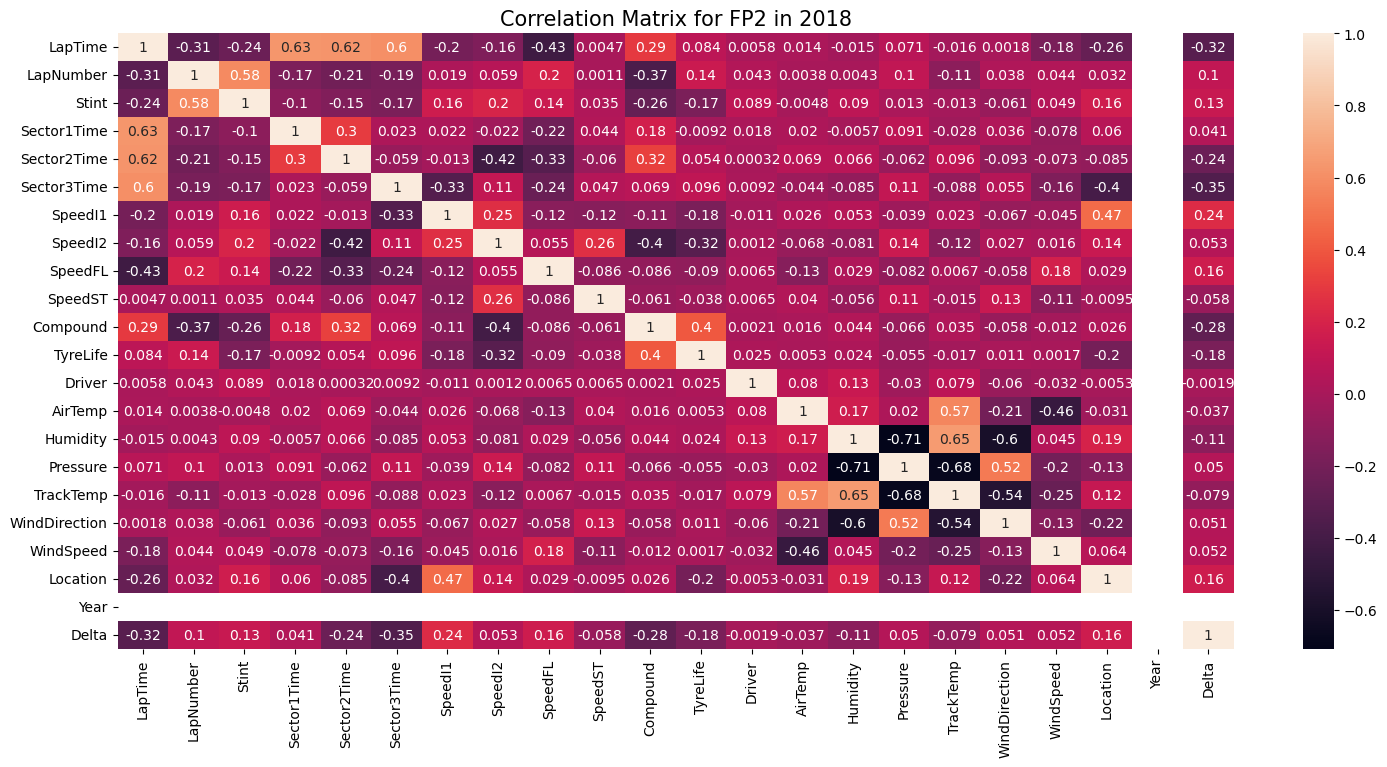

In [37]:
# Correlation matrix of qualification data.
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(fp2_2018.corr(), annot=True, ax=ax)
plt.title('Correlation Matrix for FP2 in 2018', fontsize=15)
plt.style.use('default');

In [38]:
fp2d = fp2.drop(['AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindDirection', 'WindSpeed'], axis=1)
fp2d

,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,Driver,IsAccurate,Location,Year,Delta
1076,56.260,13.0,2.0,19.460,19.998,16.802,287.0,266.0,289.0,318.0,True,4,3.0,1,True,20,2020.0,-2.234
814,97.288,10.0,2.0,17.347,41.506,38.435,283.0,316.0,220.0,321.0,True,4,3.0,2,True,1,2019.0,-0.578
1086,97.263,17.0,3.0,17.346,41.588,38.329,286.0,313.0,222.0,317.0,True,4,3.0,2,True,1,2020.0,-1.992
775,94.434,17.0,4.0,25.595,37.988,30.851,229.0,189.0,209.0,313.0,True,4,5.0,2,True,3,2019.0,-0.833
476,104.216,16.0,2.0,36.574,42.561,25.081,209.0,218.0,334.0,315.0,True,4,9.0,2,True,4,2019.0,-2.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,88.376,36.0,8.0,30.880,39.774,17.722,289.0,309.0,274.0,306.0,True,4,3.0,32,True,26,2019.0,1.446
385,68.919,8.0,2.0,17.852,34.996,16.071,322.0,266.0,323.0,256.0,True,3,4.0,32,True,27,2018.0,-0.178
803,69.217,14.0,4.0,17.854,35.185,16.178,326.0,267.0,323.0,278.0,True,4,5.0,32,True,27,2019.0,0.909
1473,73.747,31.0,8.0,19.005,37.592,17.150,299.0,258.0,296.0,286.0,True,5,11.0,32,True,27,2021.0,-3.850


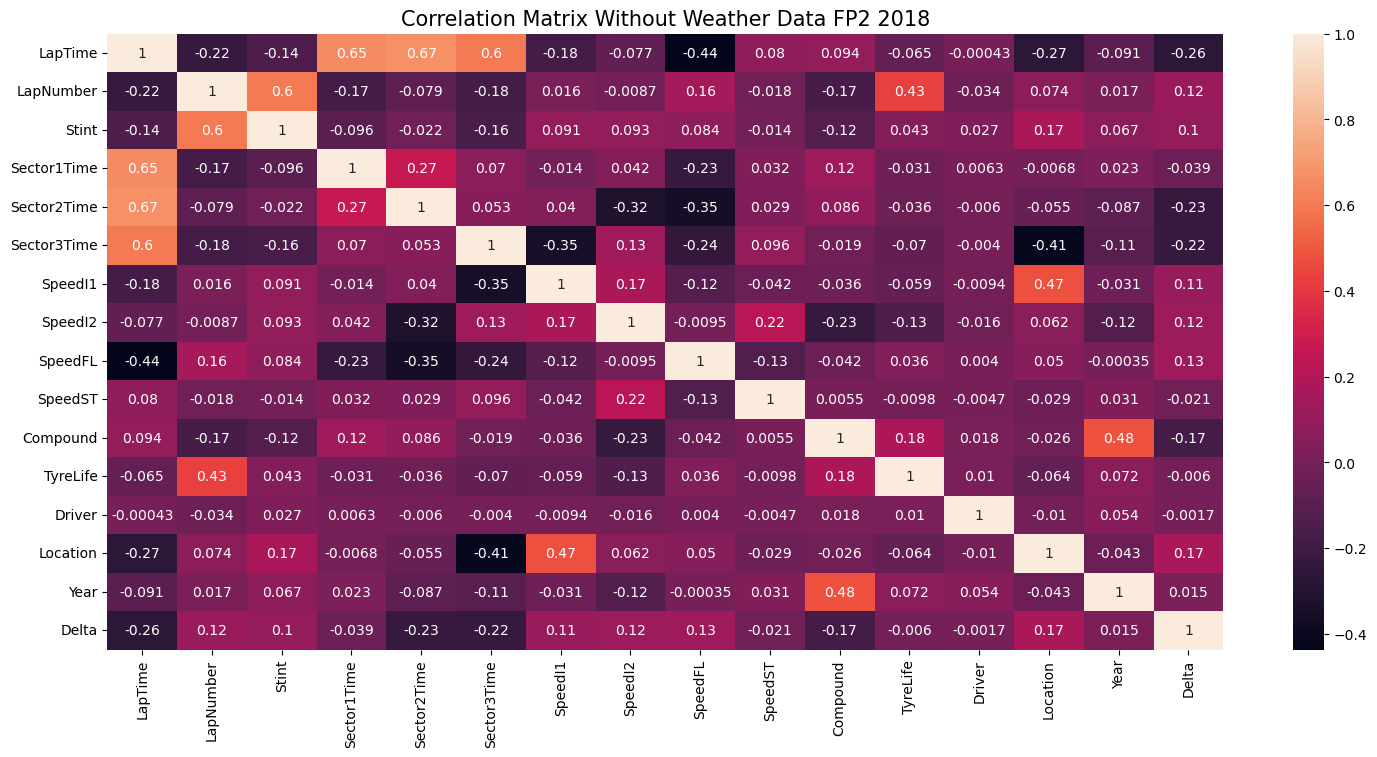

In [40]:
# Correlation matrix of qualification data.
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(fp2d.corr(), annot=True, ax=ax)
plt.title('Correlation Matrix Without Weather Data FP2 2018', fontsize=15)
plt.style.use('default');

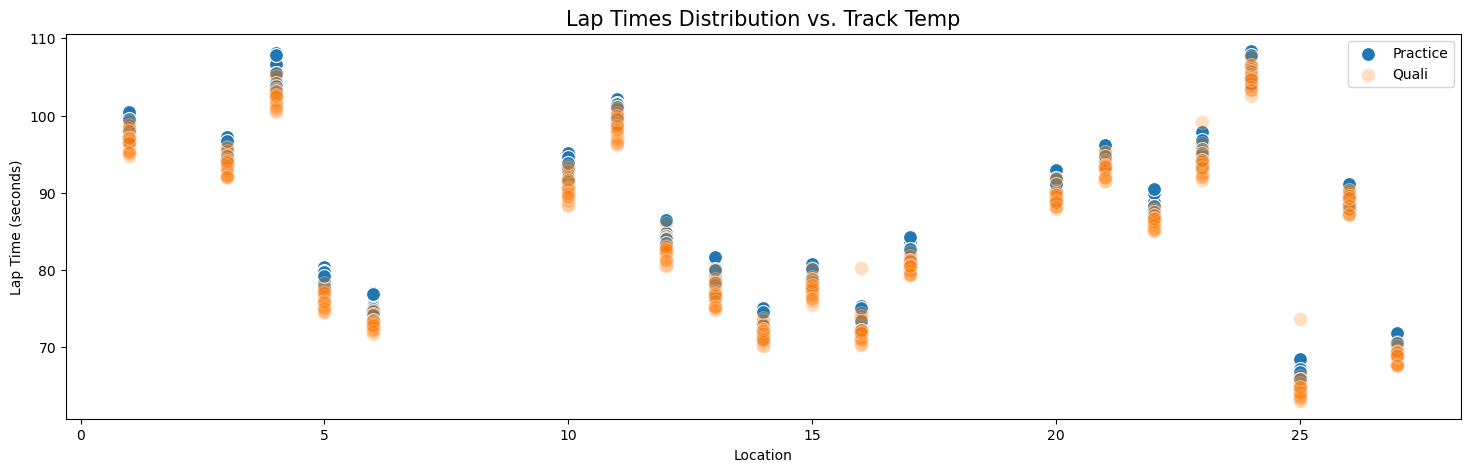

In [41]:
# This is the code I used to generate the distribution graphs. It was just a matter of changing X & y and/or using just one dataset.
fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data=fp2_2019, x='Location', y='LapTime', ax=ax, label='Practice', s=100)
sns.scatterplot(data=fastest_quali_2019, x='Location', y='LapTime', ax=ax, label='Quali', alpha=0.25, s=100)
plt.style.use('default')
# plt.xticks(fastest_practice.Location)
plt.ylabel('Lap Time (seconds)')
plt.title('Lap Times Distribution per Location', fontsize=15)
plt.legend();

## Modelling for Lap Time Predictions

In [35]:
def train_model(practice_list, model, filename):
    '''
    Automate the training process. Input data, model to use and filename to joblib the model. Remember after the first training process to use the joblib model as the model to use.
    '''
    # Seperating X & y
    X = practice_list.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
    y = practice_list.LapTime
    # Scaling data
    StandardScaler().fit_transform(X, y)
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Training, saving, loading and making predictions for evaluation metrics    
    model.fit(X_train, y_train)
    joblib.dump(model, filename)
    model = joblib.load(filename)
    train_preds = model.predict(X_test)
    print(f'Training R2 score:{model.score(X_test, y_test)}')
    print(f'Training MSE: {mean_squared_error(y_test, train_preds)}')
    print(f'Train MAE: {mean_absolute_error(y_test, train_preds)}')
    return model

In [36]:
def show_results(y, preds):
    '''
    Shows regression line of true vs. predicted values. Takes y (true values) and preds (predicted values)
    '''
    plt.scatter(y, preds, c='crimson')
    p1 = max(max(preds), max(y))
    p2 = min(min(preds), min(y))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values (Seoconds)', fontsize=15)
    plt.ylabel('Predictions (Seoconds)', fontsize=15)
    # plt.title('Predicted vs. True Values FP2 2021')
    plt.show()

### Random Forest Regressor

In [37]:
# RandomForest
rf_rg_model = train_model(fp2_2018, RandomForestRegressor(), 'rf_rg.joblib')
rf_rg_jl = joblib.load('rf_rg.joblib')
rf_rg_model = train_model(fp2_2019, rf_rg_jl, 'rf_rg.joblib')
rf_rg_model = train_model(fp2_2020, rf_rg_jl, 'rf_rg.joblib')
rf_rg_model = train_model(fp3_2018, rf_rg_jl, 'rf_rg.joblib')
rf_rg_model = train_model(fp3_2019, rf_rg_jl, 'rf_rg.joblib')
rf_rg_model = train_model(fp3_2020, rf_rg_jl, 'rf_rg.joblib')

Training R2 score:0.9989973250480513
Training MSE: 0.15785214612559423
Train MAE: 0.3152962195121721
Training R2 score:0.9985092910157382
Training MSE: 0.18366577177857044
Train MAE: 0.3156004761904742
Training R2 score:0.9987359167296775
Training MSE: 0.1777607303436554
Train MAE: 0.2740536363636516
Training R2 score:0.9776077172340624
Training MSE: 3.6325085077775
Train MAE: 0.7166945000000011
Training R2 score:0.9989177722889457
Training MSE: 0.1659318003734048
Train MAE: 0.2938155696202403
Training R2 score:0.9933492011388526
Training MSE: 1.3595787873749983
Train MAE: 0.47076392857143123


RandomForestRegressor Hold Out Predictions R2 Score: 0.3905179296634984
RandomForestRegressor Hold Out Predictions MSE: 75.92304361672309
RandomForestRegressor Hold Out Predictions MAE: 5.9459298858447465


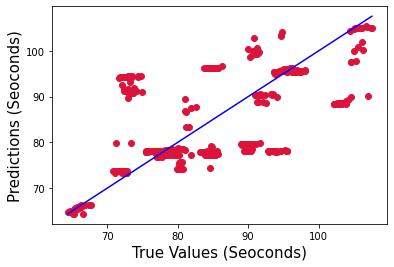

In [38]:
# Hold out predictions.
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

preds = rf_rg_jl.predict(X)
print(f'RandomForestRegressor Hold Out Predictions R2 Score: {r2_score(y, preds)}')
print(f'RandomForestRegressor Hold Out Predictions MSE: {mean_squared_error(y, preds)}')
print(f'RandomForestRegressor Hold Out Predictions MAE: {mean_absolute_error(y, preds)}')
show_results(y, preds)

### Extra Trees Regressor

In [39]:
# Extra Trees (extremely random trees)
ext_rg_model = train_model(fp2_2018, ExtraTreesRegressor(), 'ext_rg.joblib')
ext_rg_jl = joblib.load('ext_rg.joblib')
ext_rg_model = train_model(fp2_2019, ext_rg_jl, 'ext_rg.joblib')
ext_rg_model = train_model(fp2_2020, ext_rg_jl, 'ext_rg.joblib')
ext_rg_model = train_model(fp3_2018, ext_rg_jl, 'ext_rg.joblib')
ext_rg_model = train_model(fp3_2019, ext_rg_jl, 'ext_rg.joblib')
ext_rg_model = train_model(fp3_2020, ext_rg_jl, 'ext_rg.joblib')

Training R2 score:0.9967061847368548
Training MSE: 0.48952902161462714
Train MAE: 0.2796839024390144
Training R2 score:0.9988146106115232
Training MSE: 0.16500920520118365
Train MAE: 0.23258988095237076
Training R2 score:0.9983237632529959
Training MSE: 0.25026710626181825
Train MAE: 0.28815490909090546
Training R2 score:0.9989888216765017
Training MSE: 0.15000401477124742
Train MAE: 0.264475875000004
Training R2 score:0.9795216430242619
Training MSE: 2.989312462100004
Train MAE: 0.4835793670886044
Training R2 score:0.9980394294266798
Training MSE: 0.5101133588142824
Train MAE: 0.31860321428572064


Extra Trees Regressor Hold Out Predictions R2 Score: 0.809465357095572
Extra Trees Regressor Hold Out PredictionsMSE: 23.73485736133768
Extra Trees Regressor Hold Out Predictions MAE: 3.1821390639269396


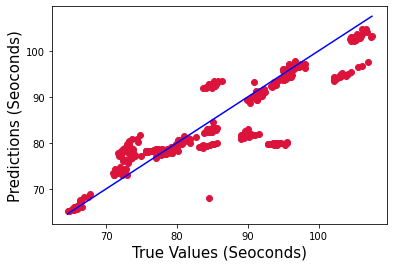

In [40]:
# Hold out predictions.
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

preds = ext_rg_jl.predict(X)
print(f'Extra Trees Regressor Hold Out Predictions R2 Score: {r2_score(y, preds)}')
print(f'Extra Trees Regressor Hold Out PredictionsMSE: {mean_squared_error(y, preds)}')
print(f'Extra Trees Regressor Hold Out Predictions MAE: {mean_absolute_error(y, preds)}')
show_results(y, preds)

### XGBoost Regressor

In [41]:
# XGBoost Regressor
xgb_rg_model = train_model(fp2_2018, XGBRegressor(), 'xgb_rg.joblib')
xgb_rg_jl = joblib.load('xgb_rg.joblib')
xgb_rg_model = train_model(fp2_2019, xgb_rg_jl, 'xgb_rg.joblib')
xgb_rg_model = train_model(fp2_2020, xgb_rg_jl, 'xgb_rg.joblib')
xgb_rg_model = train_model(fp3_2018, xgb_rg_jl, 'xgb_rg.joblib')
xgb_rg_model = train_model(fp3_2019, xgb_rg_jl, 'xgb_rg.joblib')
xgb_rg_model = train_model(fp3_2020, xgb_rg_jl, 'xgb_rg.joblib')

c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Training R2 score:0.9951002487702659
Training MSE: 0.6407371983565159
Train MAE: 0.5604096113995805


c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Training R2 score:0.9879851520717217
Training MSE: 1.4014293439513072
Train MAE: 0.6690074506487171
Training R2 score:0.9932698470647071
Training MSE: 1.182695794589824
Train MAE: 0.5124438532048996


c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Training R2 score:0.9953830922053934
Training MSE: 0.6427598266911841
Train MAE: 0.5275282684326159


c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Training R2 score:0.9705044527365283
Training MSE: 3.9319469496207176
Train MAE: 0.6770738123640233


c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Training R2 score:0.9949599375898256
Training MSE: 1.0482324088492936
Train MAE: 0.4619721281869072


XGBoost Regressor Hold Out Predictions R2 Score: 0.7952875678270996
XGBoost Regressor Hold Out Predictions MSE: 25.500981363024287
XGBoost Regressor Hold Out Predictions MAE: 3.659287507636363


c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


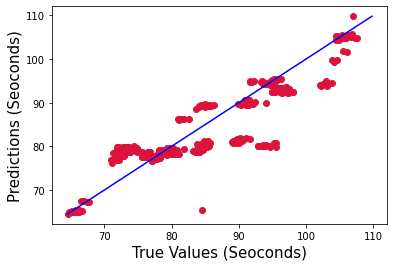

In [42]:
# Hold out predictions
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

preds = xgb_rg_jl.predict(X)
print(f'XGBoost Regressor Hold Out Predictions R2 Score: {r2_score(y, preds)}')
print(f'XGBoost Regressor Hold Out Predictions MSE: {mean_squared_error(y, preds)}')
print(f'XGBoost Regressor Hold Out Predictions MAE: {mean_absolute_error(y, preds)}')
show_results(y, preds)

### MLP Regressor 

In [43]:
# MLP (Multi-Layered Perceptron)
mlp_rg_model = train_model(fp2_2018, MLPRegressor(max_iter=2000), 'mlp_rg.joblib')
mlp_rg_jl = joblib.load('mlp_rg.joblib')
mlp_rg_model = train_model(fp2_2019, mlp_rg_jl, 'mlp_rg.joblib')
mlp_rg_model = train_model(fp2_2020, mlp_rg_jl, 'mlp_rg.joblib')
mlp_rg_model = train_model(fp3_2018, mlp_rg_jl, 'mlp_rg.joblib')
mlp_rg_model = train_model(fp3_2019, mlp_rg_jl, 'mlp_rg.joblib')
mlp_rg_model = train_model(fp3_2020, mlp_rg_jl, 'mlp_rg.joblib')

Training R2 score:0.9970734084102945
Training MSE: 0.4688365223625436
Train MAE: 0.5620349493486471
Training R2 score:0.9981484957627572
Training MSE: 0.21849713625403405
Train MAE: 0.37927927641201264
Training R2 score:0.9969836517068646
Training MSE: 0.37493814283768134
Train MAE: 0.48552656857966603
Training R2 score:0.997143255910825
Training MSE: 0.4062274978126825
Train MAE: 0.4986529240251539
Training R2 score:0.9929890361284274
Training MSE: 0.9355379747391888
Train MAE: 0.7490394325586996
Training R2 score:0.9960913887033969
Training MSE: 0.8201054083742196
Train MAE: 0.7368288892229075


MLP Regressor Hold Out Predictions R2 Score: 0.8520307508693507
MLP Regressor Hold Out Predictions MSE: 18.432495888644414
MLP Regressor Hold Out Predictions MAE: 2.1523951050063053


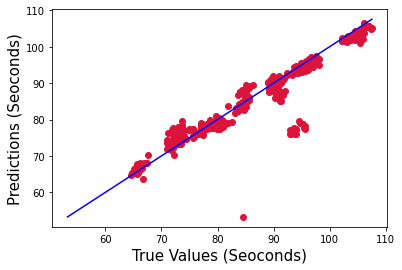

In [44]:
# Hold out predictions.
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

preds = mlp_rg_jl.predict(X)
print(f'MLP Regressor Hold Out Predictions R2 Score: {r2_score(y, preds)}')
print(f'MLP Regressor Hold Out Predictions MSE: {mean_squared_error(y, preds)}')
print(f'MLP Regressor Hold Out Predictions MAE: {mean_absolute_error(y, preds)}')
show_results(y, preds)

### Linear Regression

In [37]:
# Linear Regression Model
lin_rg_model = train_model(fp2_2018, LinearRegression(), 'lin_rg.joblib')
lin_rg_jl = joblib.load('lin_rg.joblib')
lin_rg_model = train_model(fp2_2019, lin_rg_jl, 'lin_rg.joblib')
lin_rg_model = train_model(fp2_2020, lin_rg_jl, 'lin_rg.joblib')
lin_rg_model = train_model(fp3_2018, lin_rg_jl, 'lin_rg.joblib')
lin_rg_model = train_model(fp3_2019, lin_rg_jl, 'lin_rg.joblib')
lin_rg_model = train_model(fp3_2020, lin_rg_jl, 'lin_rg.joblib')

Training R2 score:0.9317938902401832
Training MSE: 9.756600304878106
Train MAE: 0.3449390243902811
Training R2 score:1.0
Training MSE: 5.914202900856957e-28
Train MAE: 1.9624513654326576e-14
Training R2 score:1.0
Training MSE: 1.854253415035862e-27
Train MAE: 3.0747122020164335e-14
Training R2 score:1.0
Training MSE: 2.069971015299935e-27
Train MAE: 3.339550858072471e-14
Training R2 score:0.9738261220082888
Training MSE: 3.5389846064955752
Train MAE: 1.4086111985569871
Training R2 score:1.0
Training MSE: 5.03969424021195e-28
Train MAE: 1.6621624711530916e-14


Linear Regressor Hold Out Predictions R2 Score: 0.9177554294787389
Linear Regressor Hold Out Predictions MSE: 10.245187543378986
Linear Regressor Hold Out Predictions MAE: 0.15294063926943147


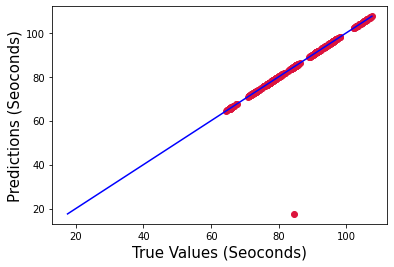

In [38]:
# Hold out predictions.
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

lin_preds = lin_rg_jl.predict(X)
print(f'Linear Regressor Hold Out Predictions R2 Score: {r2_score(y, lin_preds)}')
print(f'Linear Regressor Hold Out Predictions MSE: {mean_squared_error(y, lin_preds)}')
print(f'Linear Regressor Hold Out Predictions MAE: {mean_absolute_error(y, lin_preds)}')
show_results(y, lin_preds)

### Lasso

In [39]:
# Lasso
lasso_rg_model = train_model(fp2_2018, Lasso(), 'lasso_rg.joblib')
lasso_rg_jl = joblib.load('lasso_rg.joblib')
lasso_rg_model = train_model(fp2_2019, lasso_rg_jl, 'lasso_rg.joblib')
lasso_rg_model = train_model(fp2_2020, lasso_rg_jl, 'lasso_rg.joblib')
lasso_rg_model = train_model(fp3_2018, lasso_rg_jl, 'lasso_rg.joblib')
lasso_rg_model = train_model(fp3_2019, lasso_rg_jl, 'lasso_rg.joblib')
lasso_rg_model = train_model(fp3_2020, lasso_rg_jl, 'lasso_rg.joblib')

Training R2 score:0.9412704782449205
Training MSE: 9.321033312973642
Train MAE: 0.5550518883386785
Training R2 score:0.9992975353673905
Training MSE: 0.09406492393208334
Train MAE: 0.2497219179175577
Training R2 score:0.9995357954667737
Training MSE: 0.07516105023435994
Train MAE: 0.20347194412940425
Training R2 score:0.9993920670255013
Training MSE: 0.09852624055097335
Train MAE: 0.2607785172398776
Training R2 score:0.9601869613421065
Training MSE: 5.168995966020555
Train MAE: 1.7476332988841112
Training R2 score:0.9996232164420873
Training MSE: 0.09179084243029347
Train MAE: 0.2451416623774456


Lasso Regressor Hold Out Predictions R2 Score: 0.9231306994637509
Lasso Regressor Hold Out Predictions MSE: 9.575591377410708
Lasso Regressor Hold Out Predictions MAE: 0.5048844492618202


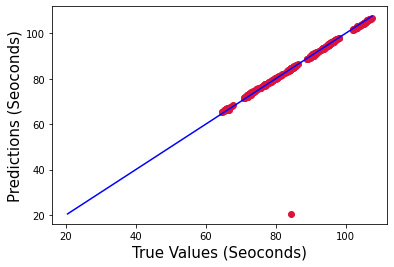

In [40]:
# Hold out predictions.
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

preds = lasso_rg_jl.predict(X)
print(f'Lasso Regressor Hold Out Predictions R2 Score: {r2_score(y, preds)}')
print(f'Lasso Regressor Hold Out Predictions MSE: {mean_squared_error(y, preds)}')
print(f'Lasso Regressor Hold Out Predictions MAE: {mean_absolute_error(y, preds)}')
show_results(y, preds)

### ElasticNet

In [41]:
# ElasticNet
el_rg_model = train_model(fp2_2018, ElasticNet(), 'el_rg.joblib')
el_rg_jl = joblib.load('el_rg.joblib')
el_rg_model = train_model(fp2_2019, el_rg_jl, 'el_rg.joblib')
el_rg_model = train_model(fp2_2020, el_rg_jl, 'el_rg.joblib')
el_rg_model = train_model(fp3_2018, el_rg_jl, 'el_rg.joblib')
el_rg_model = train_model(fp3_2019, el_rg_jl, 'el_rg.joblib')
el_rg_model = train_model(fp3_2020, el_rg_jl, 'el_rg.joblib')

Training R2 score:0.9973075336845756
Training MSE: 0.3544360892869939
Train MAE: 0.45775097290874206
Training R2 score:0.9994019914888024
Training MSE: 0.06854892819358993
Train MAE: 0.21873511038249846
Training R2 score:0.9992988502748645
Training MSE: 0.10851101648617584
Train MAE: 0.23731924925927836
Training R2 score:0.9994645065490894
Training MSE: 0.06785104273259494
Train MAE: 0.2046477829347076
Training R2 score:0.9807982971355212
Training MSE: 2.5346424398258023
Train MAE: 1.3142062152438565
Training R2 score:0.9989707803328524
Training MSE: 0.2085477161192497
Train MAE: 0.37751438943359567


ElasticNet Hold Out Predictions R2 Score: 0.9233859147589011
ElasticNet Hold Out Predictions MSE: 9.543799265832034
ElasticNet Hold Out Predictions MAE: 0.628944229329256


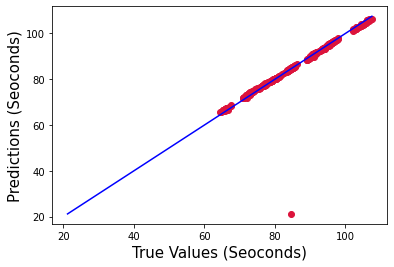

In [42]:
# Hold out predictions.
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

preds = el_rg_jl.predict(X)
print(f'ElasticNet Hold Out Predictions R2 Score: {r2_score(y, preds)}')
print(f'ElasticNet Hold Out Predictions MSE: {mean_squared_error(y, preds)}')
print(f'ElasticNet Hold Out Predictions MAE: {mean_absolute_error(y, preds)}')
show_results(y, preds)

### Linear SVR (Sector Vector Machine)

In [43]:
# Linear SVR
svr_rg_model = train_model(fp2_2018, LinearSVR(), 'svr_rg.joblib')
svr_rg_jl = joblib.load('svr_rg.joblib')
svr_rg_model = train_model(fp2_2019, svr_rg_jl, 'svr_rg.joblib')
svr_rg_model = train_model(fp2_2020, svr_rg_jl, 'svr_rg.joblib')
svr_rg_model = train_model(fp3_2018, svr_rg_jl, 'svr_rg.joblib')
svr_rg_model = train_model(fp3_2019, svr_rg_jl, 'svr_rg.joblib')
svr_rg_model = train_model(fp3_2020, svr_rg_jl, 'svr_rg.joblib')

Training R2 score:0.9979436055168007
Training MSE: 0.334153338355005
Train MAE: 0.47114160625764784
Training R2 score:0.9999991973753873
Training MSE: 0.0001309496994525494
Train MAE: 0.007976457551113605
Training R2 score:0.9999835153198293
Training MSE: 0.0025664326662495148
Train MAE: 0.03889351443870055
Training R2 score:0.9999984827011069
Training MSE: 0.00022490086545280213
Train MAE: 0.012382820113554516
Training R2 score:0.9723159809527553
Training MSE: 4.081920952865329
Train MAE: 1.6297477705985182
Training R2 score:0.9999662196839729
Training MSE: 0.007435996977977511
Train MAE: 0.06666649139566173


c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thisi\Docum

Linear SVR Hold Out Predictions R2 Score: 0.9188104286073187
Linear SVR Hold Out Predictions MSE: 10.113766540607664
Linear SVR Hold Out Predictions MAE: 0.22879613795008333


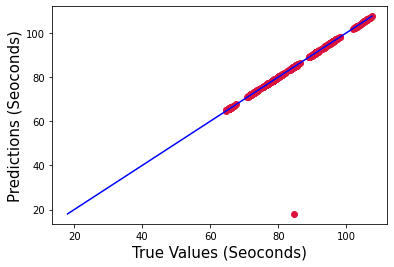

In [44]:
# Hold out predictions.
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

preds = svr_rg_jl.predict(X)
print(f'Linear SVR Hold Out Predictions R2 Score: {r2_score(y, preds)}')
print(f'Linear SVR Hold Out Predictions MSE: {mean_squared_error(y, preds)}')
print(f'Linear SVR Hold Out Predictions MAE: {mean_absolute_error(y, preds)}')
show_results(y, preds)

### Baysiean Ridge

In [45]:
# Linear SVR
bay_rg_model = train_model(fp2_2018, BayesianRidge(), 'bay_rg.joblib')
bay_rg_jl = joblib.load('bay_rg.joblib')
bay_rg_model = train_model(fp2_2019, bay_rg_jl, 'bay_rg.joblib')
bay_rg_model = train_model(fp2_2020, bay_rg_jl, 'bay_rg.joblib')
bay_rg_model = train_model(fp3_2018, bay_rg_jl, 'bay_rg.joblib')
bay_rg_model = train_model(fp3_2019, bay_rg_jl, 'bay_rg.joblib')
bay_rg_model = train_model(fp3_2020, bay_rg_jl, 'bay_rg.joblib')

Training R2 score:0.998782929122017
Training MSE: 0.19247770755558458
Train MAE: 0.37230188466903424
Training R2 score:1.0
Training MSE: 8.048645291098965e-22
Train MAE: 2.356616489253481e-11
Training R2 score:1.0
Training MSE: 7.791168937592116e-21
Train MAE: 6.329527609109805e-11
Training R2 score:1.0
Training MSE: 8.127486105512882e-22
Train MAE: 2.3731239195967646e-11
Training R2 score:0.5682829487150788
Training MSE: 60.37067848048541
Train MAE: 0.8741772152125891
Training R2 score:1.0
Training MSE: 8.901882357103121e-21
Train MAE: 7.418383367913911e-11


Bayesian Ridge Hold Out Predictions R2 Score: 0.9177554294812499
Bayssian Ridge Hold Out Predictions MSE: 10.245187543066201
Bayesian Ridge Hold Out Predictions MAE: 0.15294063937704364


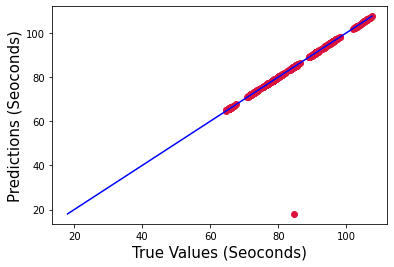

In [46]:
# Hold out predictions.
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

bay_preds = bay_rg_jl.predict(X)
print(f'Bayesian Ridge Hold Out Predictions R2 Score: {r2_score(y, bay_preds)}')
print(f'Bayssian Ridge Hold Out Predictions MSE: {mean_squared_error(y, bay_preds)}')
print(f'Bayesian Ridge Hold Out Predictions MAE: {mean_absolute_error(y, bay_preds)}')
show_results(y, preds)

## Tuning HyperParameters

### Initial Tree Based Model Param Grids

In [67]:
X = fp2.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2.LapTime

# Building parameter grids for our models for hyperparameter tuning using Randomized Search CV.
rf_grid = {'n_estimators': [25, 25, 50, 75],
           'max_depth': [2, 5, 10, 15],
           'min_samples_leaf': [2, 5, 7, 10],
           'max_leaf_nodes': [5, 10, 15, 20]}
ext_grid = {'n_estimators': [15, 25, 50, 75],
            'max_depth': [2, 5, 10, 15],
            'min_samples_leaf': [2, 5, 7, 10],
            'max_leaf_nodes': [5, 10, 15, 20]}
xgb_grid = {'n_estimators': [25, 25, 50, 75],
            'max_depth': [2, 5, 10, 15],
            'gamma': [0.01, 0.001, 0.0001, 0.00001],
            'min_child_weight': [0.9, 0.5, 0.25, 0.1, 0.01, 0.001],
            'subsample': [0.9, 0.5, 0.25, 0.1],
            'colsample_bytree': [0.9, 0.5, 0.25, 0.1]}
mlp_grid = {'hidden_layer_sizes': [(15,), (25,), (50,), (75,)],
            'alpha': [0.1, 0.01, 0.001],
            'learning_rate_init': [0.25, 0.1, 0.01],
            'max_iter': [2000],
            'tol': [0.1, 0.01, 0.001],
            'early_stopping': [False, True],
            'n_iter_no_change': [15, 18, 20, 25]}

rs_rf_rg_jl = RandomizedSearchCV(rf_rg_jl, rf_grid, cv=10).fit(X, y)
rs_ext_rg_jl = RandomizedSearchCV(ext_rg_jl, ext_grid, cv=10).fit(X, y)
rs_xgb_rg_jl = RandomizedSearchCV(xgb_rg_jl, xgb_grid, cv=10).fit(X, y)
rs_mlp_rg_jl = RandomizedSearchCV(mlp_rg_jl, mlp_grid, cv=10).fit(X, y)

c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py

In [68]:
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

rf_preds = rs_rf_rg_jl.predict(X) 
ext_preds = rs_ext_rg_jl.predict(X)                    
xgb_preds = rs_xgb_rg_jl.predict(X)
mlp_preds = rs_mlp_rg_jl.predict(X)

print(f'Randomized Search RandomForestRegressor Hold Out Predictions R2 score: {rs_rf_rg_jl.score(X, y)}')
print(f'Randomized Search RandomForestRegressor Hold Out Predictions MSE: {mean_squared_error(y, rf_preds)}')
print(f'Randomized Search RandomForestRegressor Hold Out Predictions MAE: {mean_absolute_error(y, rf_preds)}')

print(f'Randomized Search Extra Trees Regressor Hold Out Predictions R2 score: {rs_ext_rg_jl.score(X, y)}')
print(f'Randomized Search Extra Trees Regressor Hold Out Predictions MSE: {mean_squared_error(y, ext_preds)}')
print(f'Randomized Search Extra Trees Regressor Hold Out Predictions MAE: {mean_absolute_error(y, ext_preds)}')

print(f'Randomized Search XGBoost Regressor Hold Out Predictions R2 score: {rs_xgb_rg_jl.score(X, y)}')
print(f'Randomized Search XGBoost Regressor Hold Out Predictions MSE: {mean_squared_error(y, xgb_preds)}')
print(f'Randomized Search XGBoost Regressor Hold Out Predictions MAE: {mean_absolute_error(y, xgb_preds)}')

print(f'Randomized Search MLP Regressor Hold Out Predictions R2 score: {rs_mlp_rg_jl.score(X, y)}')
print(f'Randomized Search MLP Regressor Regressor Hold Out Predictions MSE: {mean_squared_error(y, mlp_preds)}')
print(f'Randomized Search MLP Regressor Regressor Hold Out Predictions MAE: {mean_absolute_error(y, mlp_preds)}')

Randomized Search RandomForestRegressor Hold Out Predictions R2 score: 0.9820644589766525
Randomized Search RandomForestRegressor Hold Out Predictions MSE: 2.2342262876630907
Randomized Search RandomForestRegressor Hold Out Predictions MAE: 0.8664983152983583
Randomized Search Extra Trees Regressor Hold Out Predictions R2 score: 0.9862415448371962
Randomized Search Extra Trees Regressor Hold Out Predictions MSE: 1.7138876470107844
Randomized Search Extra Trees Regressor Hold Out Predictions MAE: 0.9917016626537862
Randomized Search XGBoost Regressor Hold Out Predictions R2 score: 0.9997259121510595
Randomized Search XGBoost Regressor Hold Out Predictions MSE: 0.034143061334734305
Randomized Search XGBoost Regressor Hold Out Predictions MAE: 0.1354643011223784
Randomized Search MLP Regressor Hold Out Predictions R2 score: 0.924907806337627
Randomized Search MLP Regressor Regressor Hold Out Predictions MSE: 9.354217576172585
Randomized Search MLP Regressor Regressor Hold Out Predictions 

c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [55]:
# Chose XGBoost model as the best improved and got best params.
rs_xgb_rg_jl.best_params_

{'subsample': 0.5,
 'n_estimators': 25,
 'min_child_weight': 0.1,
 'max_depth': 10,
 'gamma': 0.01,
 'colsample_bytree': 0.5}

### Additional Linear Model Param Grids

In [47]:
X = fp2.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2.LapTime

# Param Grids. Did not make one for LinearRegression() and BayesianRidge since there aren't many tunable parameters or parameters that aren't evident as to their effect on performance of the model.

lasso_grid = {'alpha': [0.25, 0.5, 1, 1.5, 2],
              'tol': [0.001, 0.0001, 0.00001],
              'selection': ['cyclic', 'random']}

elastic_grid = {'alpha': [0.25, 0.5, 1, 1.5, 2],
                'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                'tol': [0.001, 0.0001, 0.00001],
                'selection': ['cyclic', 'random']}
svr_grid = {'tol': [0.001, 0.0001, 0.00001],
            'C': [0.25, 0.5, 1, 1.5, 2],
            'loss': ['epsilon_insensitive', 'squared_epsilon_insensitve'],
            'intercept_scaling': [0.25, 0.5, 1, 1.5, 2]}

rs_lasso_rg_jl = RandomizedSearchCV(lasso_rg_jl, lasso_grid, cv=10).fit(X, y)
rs_el_rg_jl = RandomizedSearchCV(el_rg_jl, elastic_grid, cv=10).fit(X, y)
rs_svr_rg_jl = RandomizedSearchCV(svr_rg_jl, svr_grid, cv=10).fit(X, y)

c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.578e+03, tolerance: 1.975e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.953e+03, tolerance: 1.966e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

In [48]:
# Evaluating predictions
X = fp2_2021.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fp2_2021.LapTime

lasso_preds = rs_lasso_rg_jl.predict(X)
el_preds = rs_el_rg_jl.predict(X)
svr_preds = rs_svr_rg_jl.predict(X)

print(f'Lasso Regressor predictions R2 score: {r2_score(y, lasso_preds)}')
print(f'Lasso Regressor predictions MSE: {mean_squared_error(y, lasso_preds)}')
print(f'Lasso Regressor predictions MAE: {mean_absolute_error(y, lasso_preds)} ')

print(f'ElasticNet Regressor predictions R2 score: {r2_score(y, el_preds)}')
print(f'ElasticNet Regressor predictions MSE: {mean_squared_error(y, el_preds)}')
print(f'ElasticNet Regressor predictions MAE: {mean_absolute_error(y, el_preds)} ')

print(f'LinearSVR predictions R2 score: {r2_score(y, svr_preds)}')
print(f'LinearSVR predictions MSE: {mean_squared_error(y, svr_preds)}')
print(f'LinearSVR predictions MAE: {mean_absolute_error(y, svr_preds)} ')

Lasso Regressor predictions R2 score: 0.92578016553737
Lasso Regressor predictions MSE: 9.245547988017243
Lasso Regressor predictions MAE: 0.5487443734342515 
ElasticNet Regressor predictions R2 score: 0.925876569389417
ElasticNet Regressor predictions MSE: 9.233538981977498
ElasticNet Regressor predictions MAE: 0.5579970834404697 
LinearSVR predictions R2 score: 0.9229802914203928
LinearSVR predictions MSE: 9.594327673344536
LinearSVR predictions MAE: 0.4530657477443507 


## Results

### XGBoost Regressor Results

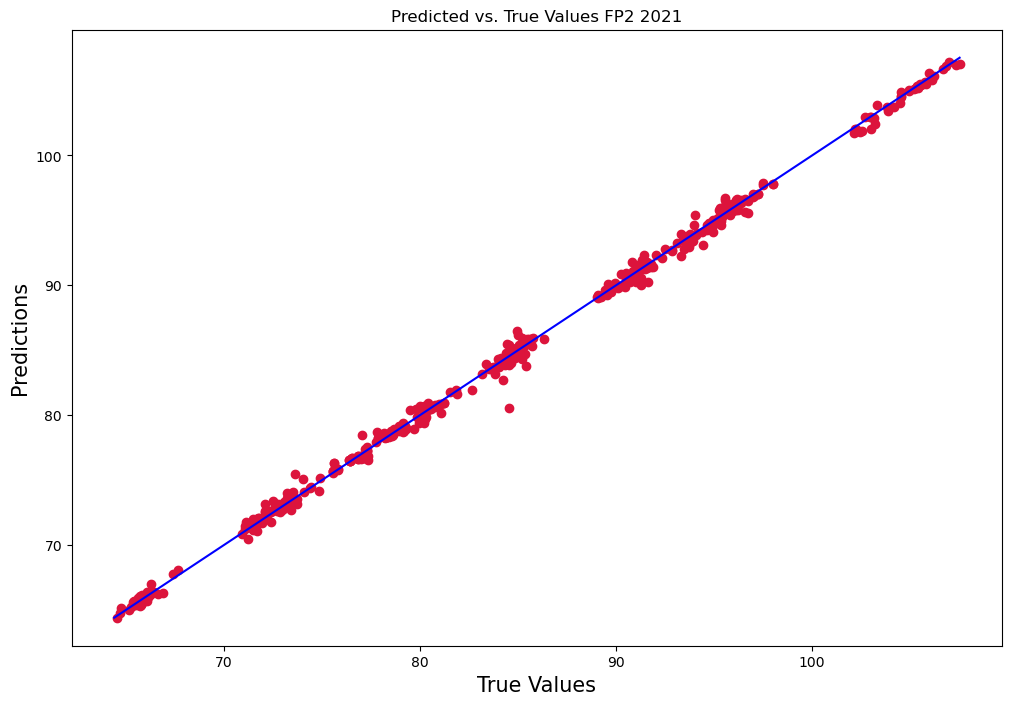

In [65]:
# Simple plot of line of regression line
plt.figure(figsize=(12,8))
plt.scatter(y, xgb_preds, c='crimson')

p1 = max(max(xgb_preds), max(y))
p2 = min(min(xgb_preds), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (Seconds)', fontsize=15)
plt.ylabel('Predictions (Seconds)', fontsize=15)
plt.title('Predicted vs. True Values FP2 2021')
plt.show()

In [66]:
# Predictions on Qualification data. All training was made on practice data.
X = fastest_quali_2018.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y = fastest_quali_2018.LapTime

xgb_preds = rs_xgb_rg_jl.predict(X)

print(f'Randomized Search XGBoost Regressor Hold Out Predictions R2 score: {rs_xgb_rg_jl.score(X, y)}')
print(f'Randomized Search XGBoost Regressor Hold Out Predictions MSE: {mean_squared_error(y, xgb_preds)}')
print(f'Randomized Search XGBoost Regressor Hold Out Predictions MAE: {mean_absolute_error(y, xgb_preds)}')

Randomized Search XGBoost Regressor Hold Out Predictions R2 score: 0.9159614659864093
Randomized Search XGBoost Regressor Hold Out Predictions MSE: 13.01706596571539
Randomized Search XGBoost Regressor Hold Out Predictions MAE: 2.2969178467534057


c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


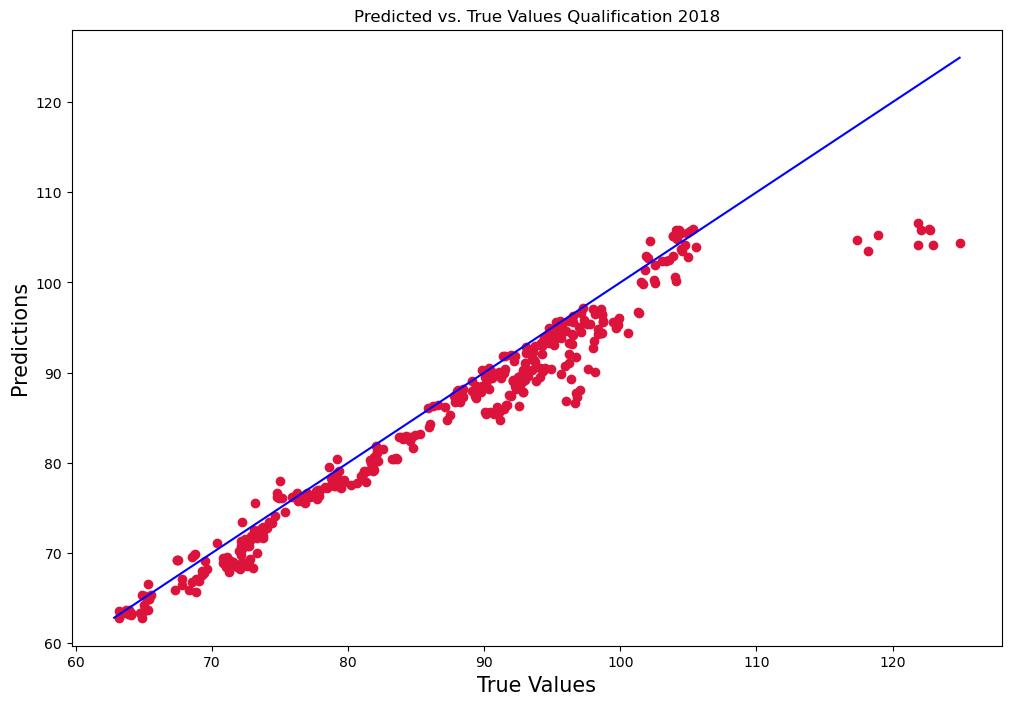

In [67]:
# Simple plot of line of regression line
plt.figure(figsize=(12,8))
plt.scatter(y, xgb_preds, c='crimson')

p1 = max(max(xgb_preds), max(y))
p2 = min(min(xgb_preds), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values (Seconds)', fontsize=15)
plt.ylabel('Predictions (Seconds)', fontsize=15)
plt.title('Predicted vs. True Values Qualification 2018')
plt.show()

### Linear Models Results

In [64]:
# Predictions on Qualification data. All training was made on practice data.
X = fastest_quali_2018.drop(['LapTime', 'Year', 'IsAccurate', 'IsPersonalBest', 'AirTemp', 'Humidity', 'Pressure', 'WindSpeed', 'WindDirection', 'TrackTemp', 'Driver'], axis=1)
y1 = fastest_quali_2018.LapTime

lasso1_preds = rs_lasso_rg_jl.predict(X)
el1_preds = rs_el_rg_jl.predict(X)
svr1_preds = rs_svr_rg_jl.predict(X)
lin1_preds = lin_rg_jl.predict(X)
bay1_preds = bay_rg_jl.predict(X)

print(f'Randomized Search Lasso Regressor Hold Out Predictions R2 score: {r2_score(y1, lasso1_preds)}')
print(f'Randomized Search Lasso Regressor Hold Out Predictions MSE: {mean_squared_error(y1, lasso1_preds)}')
print(f'Randomized Search Lasso Regressor Hold Out Predictions MAE: {mean_absolute_error(y1, lasso1_preds)}')

print(f'Randomized Search ElasticNet Regressor Hold Out Predictions R2 score: {r2_score(y1, el1_preds)}')
print(f'Randomized Search ElasticNet Regressor Hold Out Predictions MSE: {mean_squared_error(y1, el1_preds)}')
print(f'Randomized Search ElasticNet Regressor Hold Out Predictions MAE: {mean_absolute_error(y1, el1_preds)}')

print(f'Randomized Search Linear SVR Hold Out Predictions R2 score: {r2_score(y1, svr1_preds)}')
print(f'Randomized Search Linear SVR Hold Out Predictions MSE: {mean_squared_error(y1, svr1_preds)}')
print(f'Randomized Search Linear SVR Hold Out Predictions MAE: {mean_absolute_error(y1, svr1_preds)}')

print(f'Linear Regressor Hold Out Predictions R2 score: {r2_score(y1, lin1_preds)}')
print(f'Linear Regressor Hold Out Predictions MSE: {mean_squared_error(y1, lin1_preds)}')
print(f'Linear Regressor Hold Out Predictions MAE: {mean_absolute_error(y1, lin1_preds)}')

print(f'Bayesian Ridge Regressor Hold Out Predictions R2 score: {r2_score(y1, bay1_preds)}')
print(f'Bayesian Ridge Regressor Hold Out Predictions MSE: {mean_squared_error(y1, bay1_preds)}')
print(f'Bayesian Ridge Regressor Hold Out Predictions MAE: {mean_absolute_error(y1, bay1_preds)}')

Randomized Search Lasso Regressor Hold Out Predictions R2 score: 0.9953353888594628
Randomized Search Lasso Regressor Hold Out Predictions MSE: 0.7225203489504518
Randomized Search Lasso Regressor Hold Out Predictions MAE: 0.6787993023389429
Randomized Search ElasticNet Regressor Hold Out Predictions R2 score: 0.9945205492086118
Randomized Search ElasticNet Regressor Hold Out Predictions MSE: 0.8487341342229596
Randomized Search ElasticNet Regressor Hold Out Predictions MAE: 0.7465889729209028
Randomized Search Linear SVR Hold Out Predictions R2 score: 0.9937573623413967
Randomized Search Linear SVR Hold Out Predictions MSE: 0.9669472124413524
Randomized Search Linear SVR Hold Out Predictions MAE: 0.8811261817560708
Linear Regressor Hold Out Predictions R2 score: 1.0
Linear Regressor Hold Out Predictions MSE: 2.6265485876947096e-27
Linear Regressor Hold Out Predictions MAE: 4.053869424795547e-14
Bayesian Ridge Regressor Hold Out Predictions R2 score: 1.0
Bayesian Ridge Regressor Hold O

c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PLapTime
Feature names seen at fit time, yet now missing:
- Delta

  warnings.warn(message, FutureWarning)
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PLapTime
Feature names seen at fit time, yet now missing:
- Delta

  warnings.warn(message, FutureWarning)
c:\Users\thisi\Documents\concordia-bootcamps\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PLapTime
Feature names seen at

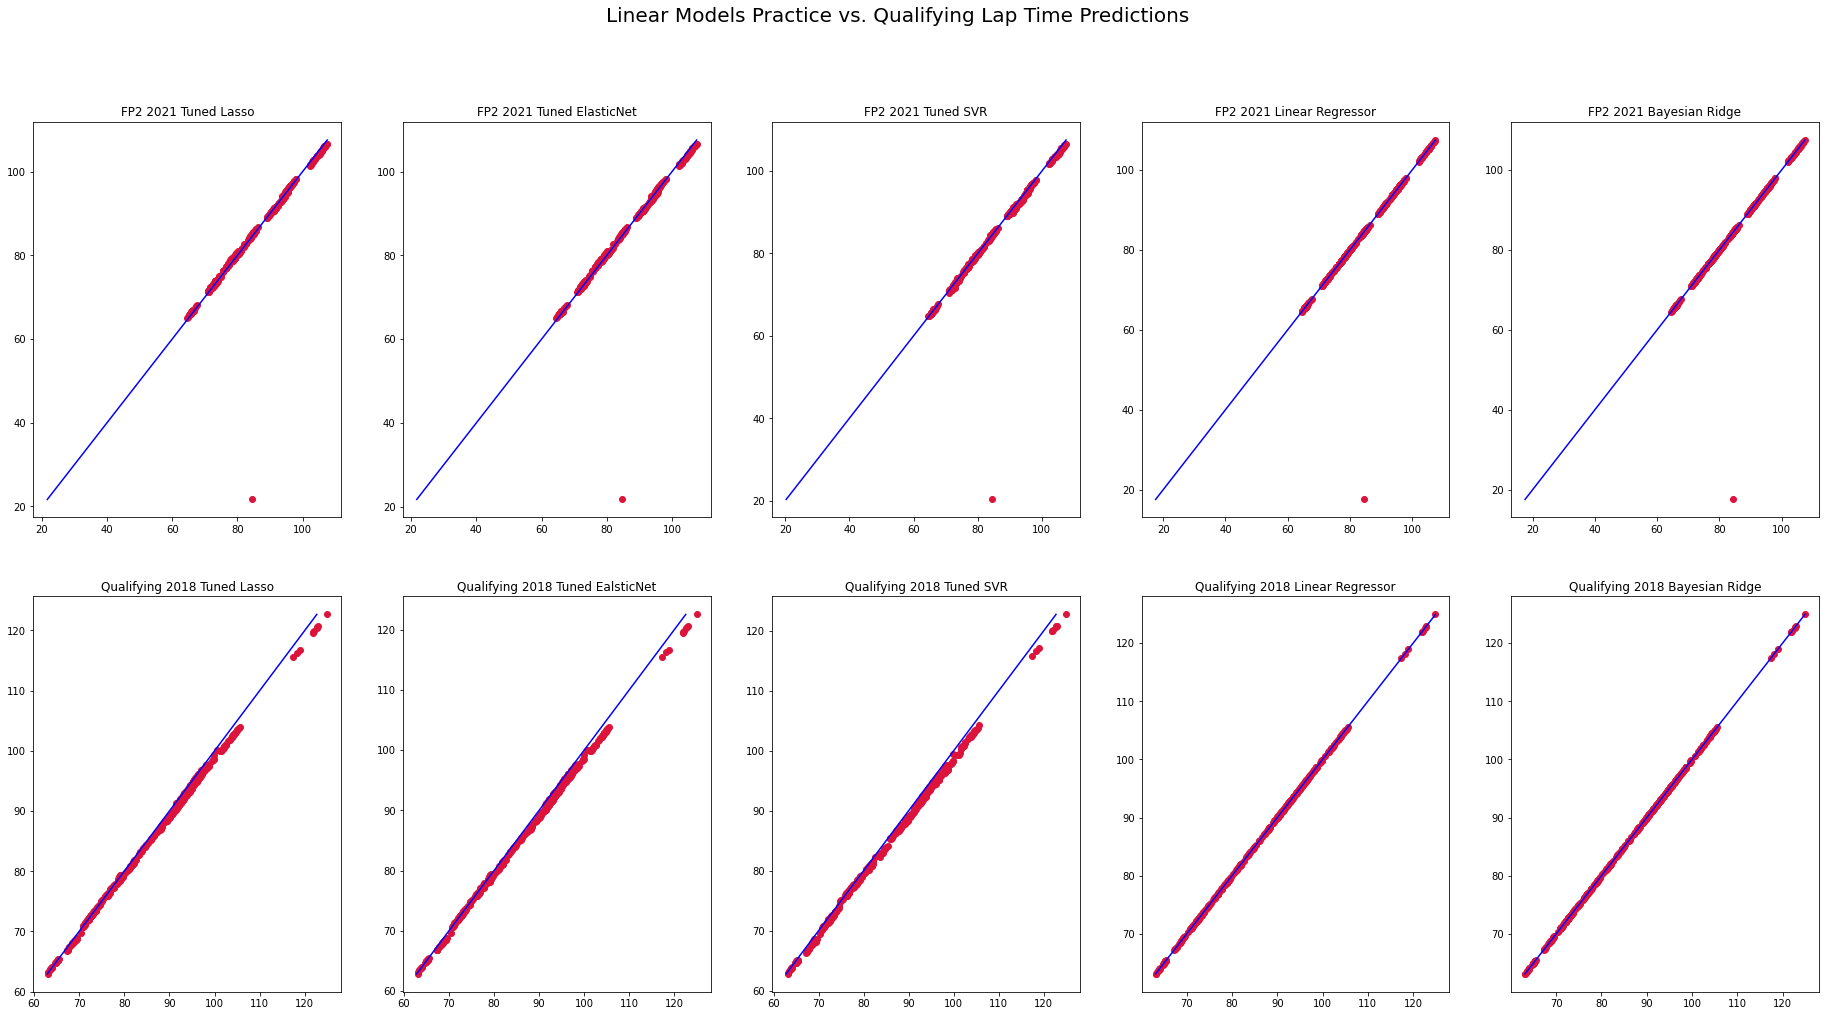

In [62]:
# Plotting the results of predictions on Practice data and camparing it to predictions on Qualifying data (hold out)
fig, ax = plt.subplots(2, 5, figsize=(32, 16))
ax[0, 0].scatter(y, lasso_preds, c='crimson')
p1 = max(max(lasso_preds), max(y))
p2 = min(min(lasso_preds), min(y))
ax[0, 0].plot([p1, p2], [p1, p2], 'b-')
ax[0, 0].title.set_text('FP2 2021 Tuned Lasso')

ax[0, 1].scatter(y, el_preds, c='crimson')
p1 = max(max(el_preds), max(y))
p2 = min(min(el_preds), min(y))
ax[0, 1].plot([p1, p2], [p1, p2], 'b-')
ax[0, 1].title.set_text('FP2 2021 Tuned ElasticNet')

ax[0, 2].scatter(y, svr_preds, c='crimson')
p1 = max(max(svr_preds), max(y))
p2 = min(min(svr_preds), min(y))
ax[0, 2].plot([p1, p2], [p1, p2], 'b-')
ax[0, 2].title.set_text('FP2 2021 Tuned SVR')

ax[0, 3].scatter(y, lin_preds, c='crimson')
p1 = max(max(lin_preds), max(y))
p2 = min(min(lin_preds), min(y))
ax[0, 3].plot([p1, p2], [p1, p2], 'b-')
ax[0, 3].title.set_text('FP2 2021 Linear Regressor')

ax[0, 4].scatter(y, bay_preds, c='crimson')
p1 = max(max(bay_preds), max(y))
p2 = min(min(bay_preds), min(y))
ax[0, 4].plot([p1, p2], [p1, p2], 'b-')
ax[0, 4].title.set_text('FP2 2021 Bayesian Ridge')

ax[1, 0].scatter(y1, lasso1_preds, c='crimson')
p1 = max(max(lasso1_preds), max(y))
p2 = min(min(lasso1_preds), min(y))
ax[1, 0].plot([p1, p2], [p1, p2], 'b-')
ax[1, 0].title.set_text('Qualifying 2018 Tuned Lasso')

ax[1, 1].scatter(y1, el1_preds, c='crimson')
p1 = max(max(el1_preds), max(y))
p2 = min(min(el1_preds), min(y))
ax[1, 1].plot([p1, p2], [p1, p2], 'b-')
ax[1, 1].title.set_text('Qualifying 2018 Tuned EalsticNet')

ax[1, 2].scatter(y1, svr1_preds, c='crimson')
p1 = max(max(svr1_preds), max(y))
p2 = min(min(svr1_preds), min(y))
ax[1, 2].plot([p1, p2], [p1, p2], 'b-')
ax[1, 2].title.set_text('Qualifying 2018 Tuned SVR')

ax[1, 3].scatter(y1, lin1_preds, c='crimson')
p1 = max(max(lin1_preds), max(y))
p2 = min(min(lin1_preds), min(y))
ax[1, 3].plot([p1, p2], [p1, p2], 'b-')
ax[1, 3].title.set_text('Qualifying 2018 Linear Regressor')

ax[1, 4].scatter(y1, bay1_preds, c='crimson')
p1 = max(max(bay1_preds), max(y))
p2 = min(min(bay1_preds), min(y))
ax[1, 4].plot([p1, p2], [p1, p2], 'b-')
ax[1, 4].title.set_text('Qualifying 2018 Bayesian Ridge')
fig.suptitle('Linear Models Practice vs. Qualifying Lap Time Predictions', fontsize=20);
